In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sma
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    r2_score,
    mean_absolute_percentage_error,
    mean_squared_error
)

plt.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

from scipy import stats

In [2]:
data = pd.read_csv('media prediction and its cost.csv')

In [3]:
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [4]:
df_cat=data.select_dtypes(exclude=np.number)
df_num=data.select_dtypes(include=np.number)
df_num.shape[1]
df_cat.columns

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [5]:
data.shape

(60428, 40)

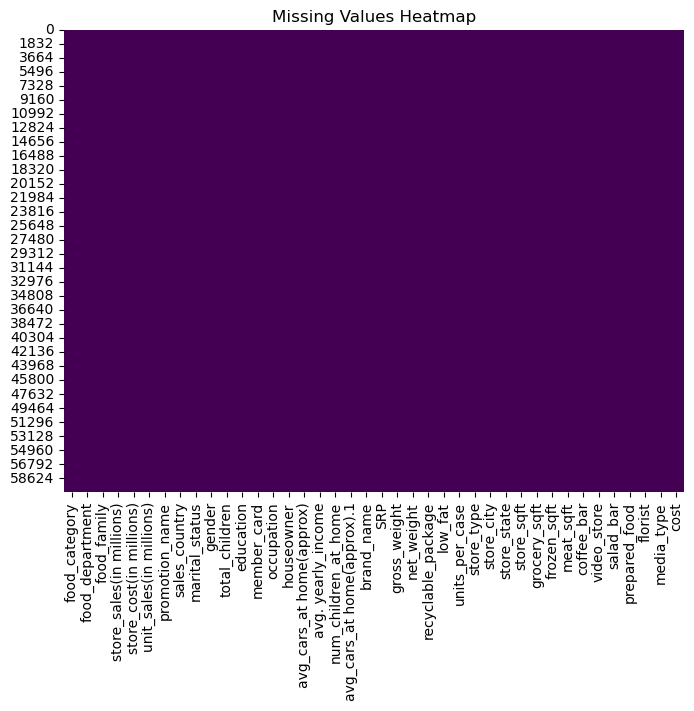

In [6]:
missing_values = data.isnull()
plt.figure(figsize=(8, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [7]:
usdata = data.query("sales_country == 'USA'")

In [8]:
usdata.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [9]:
usnum_cols=usdata.select_dtypes(include=np.number).columns.to_list()

In [10]:
usdf_cat=usdata.select_dtypes(exclude=np.number)
usdf_num=usdata.select_dtypes(include=np.number)
usdf_num.shape[1]
usdf_cat.columns

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [11]:
usdata.shape

(38892, 40)

In [12]:
usdf_num.columns

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
       'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

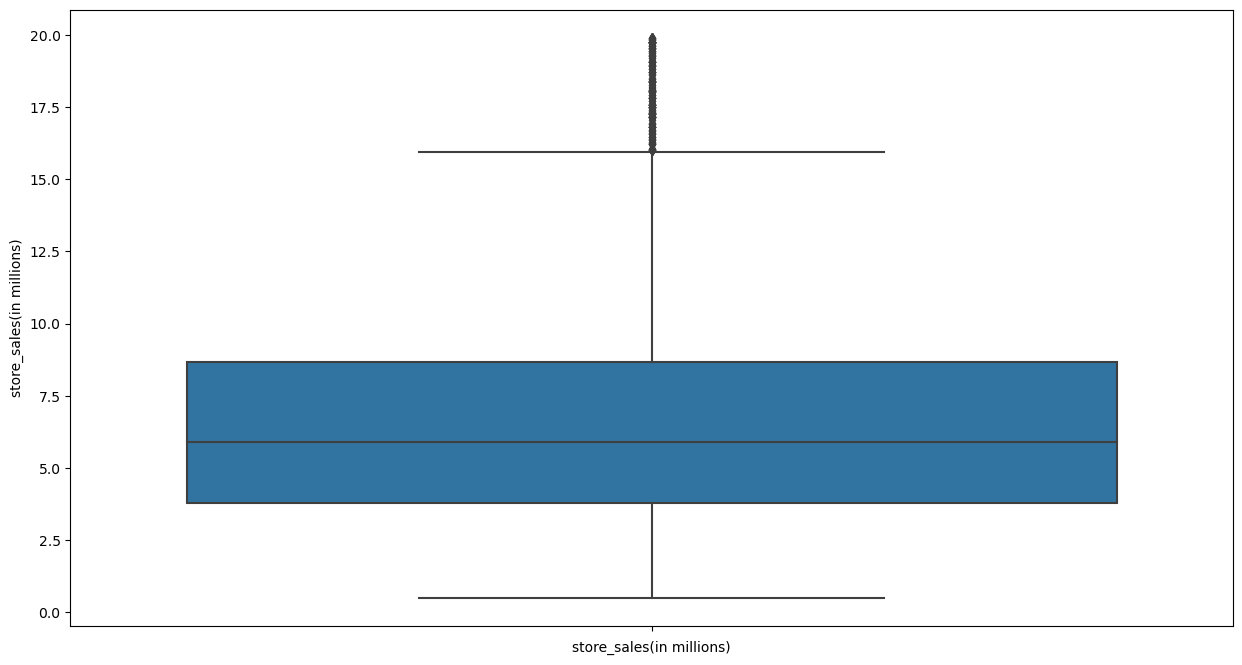

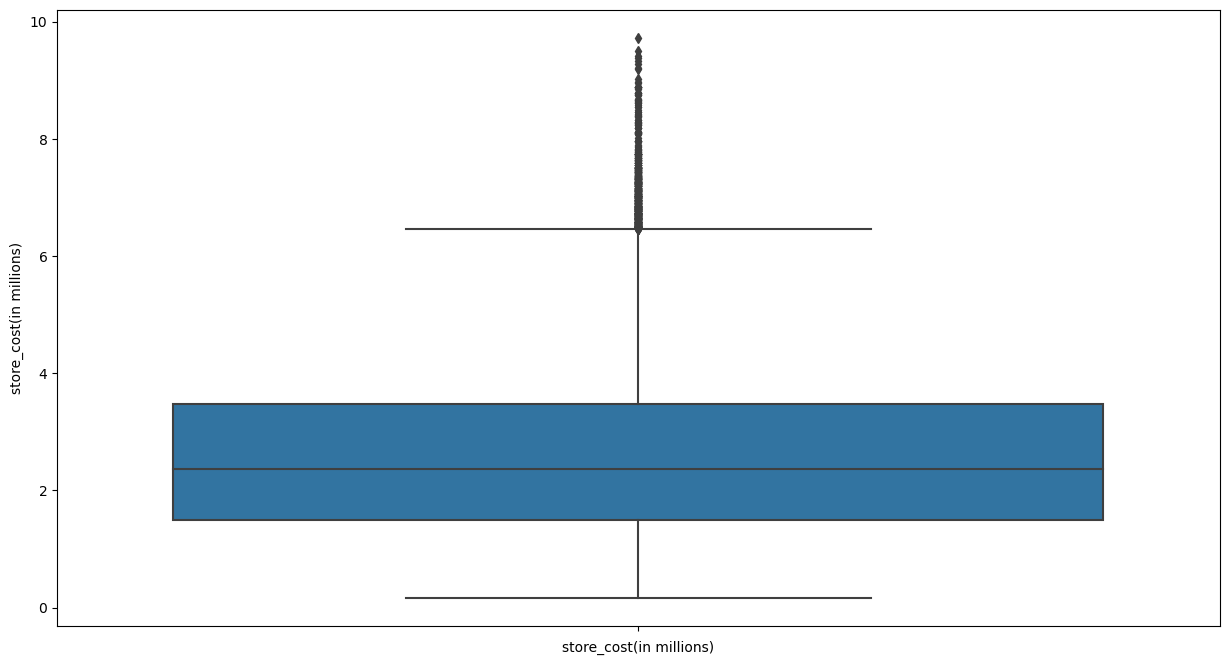

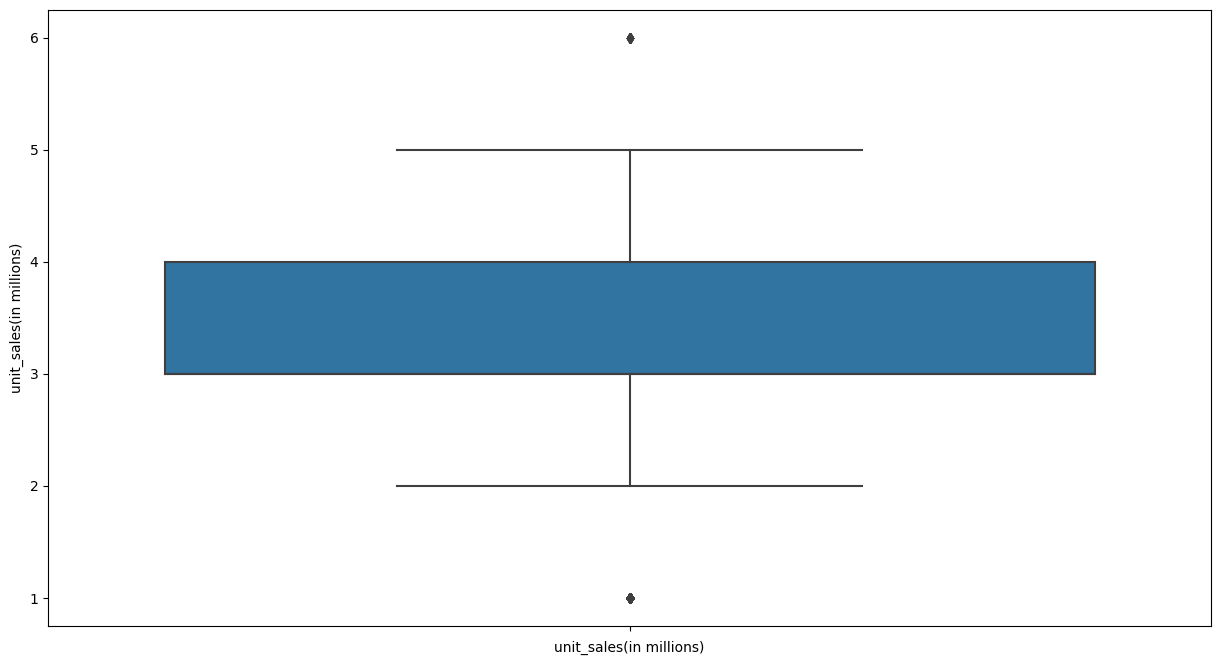

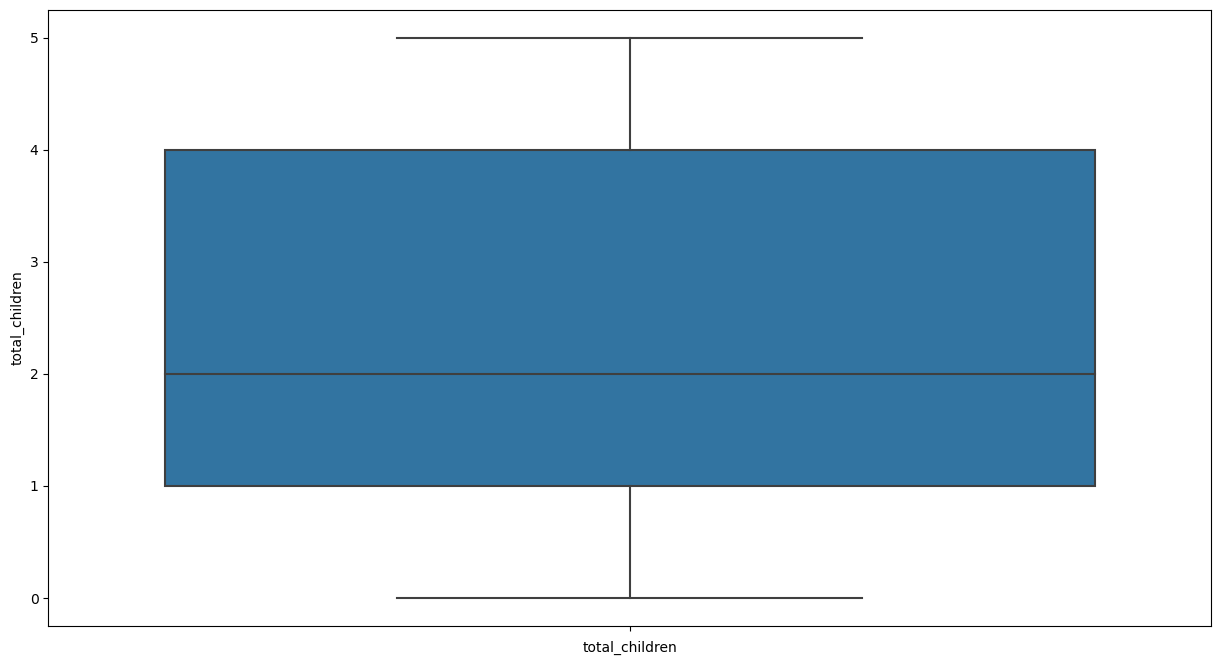

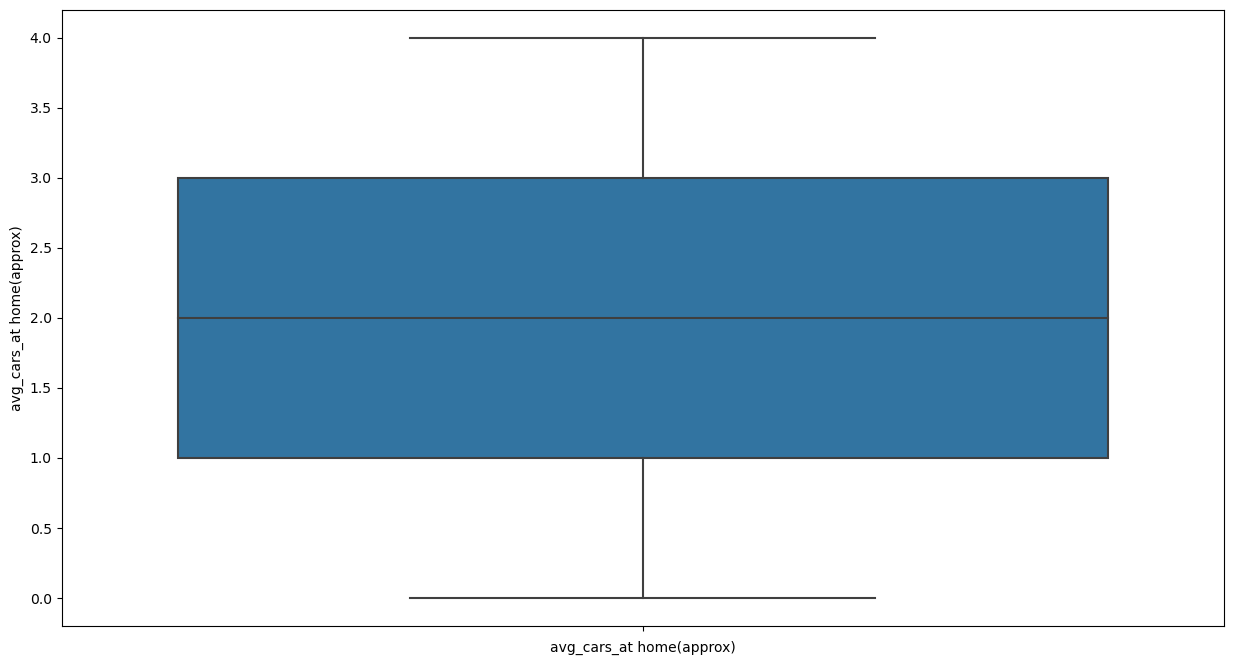

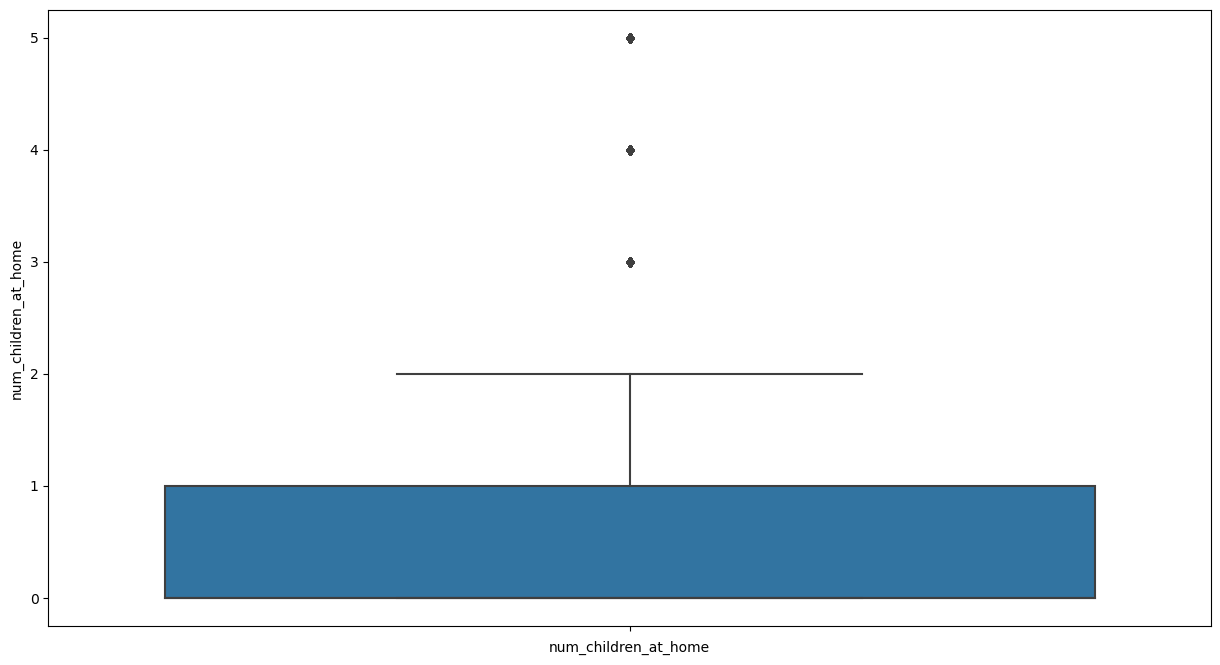

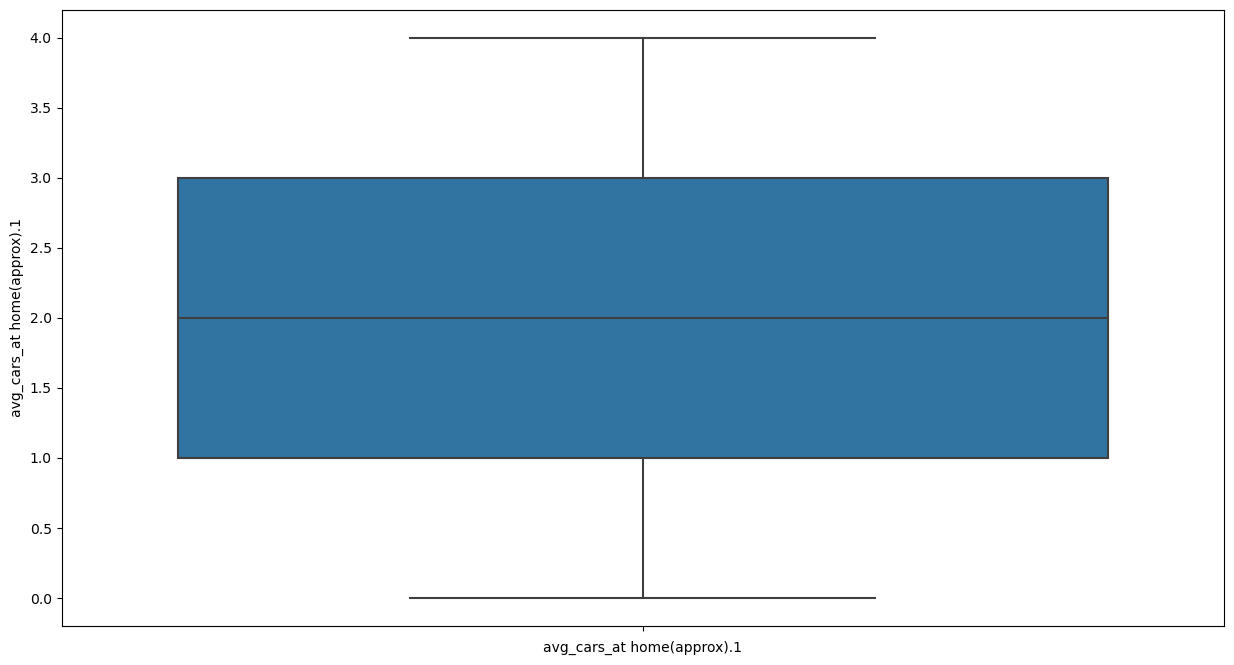

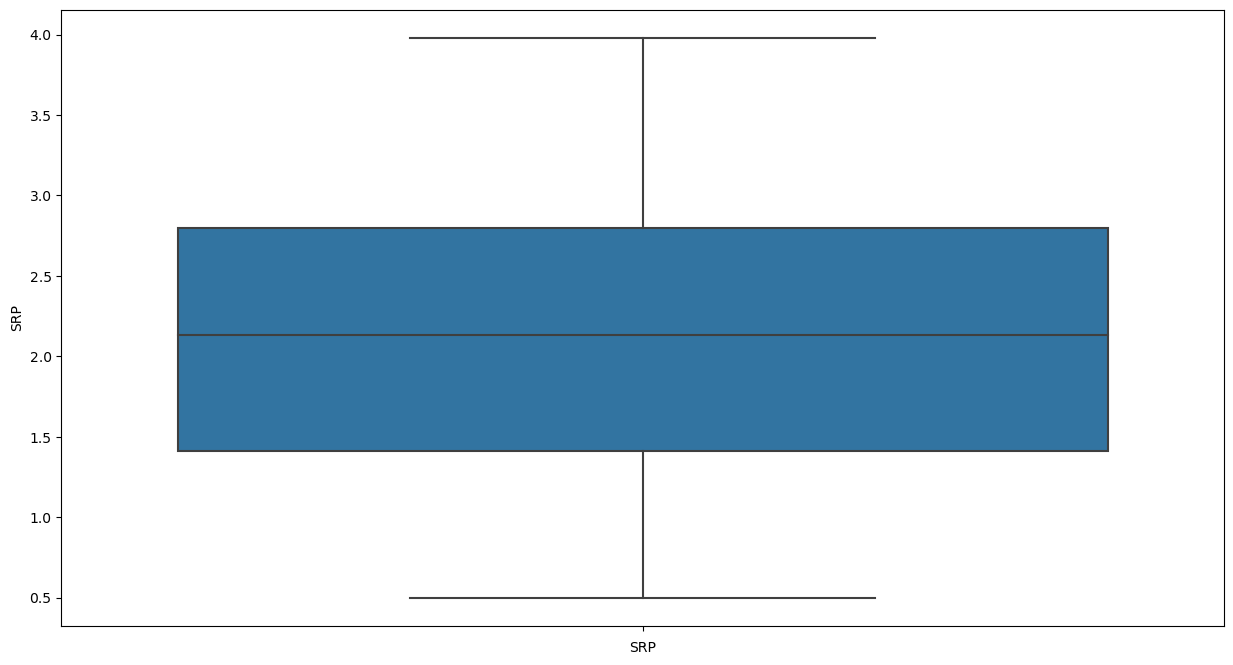

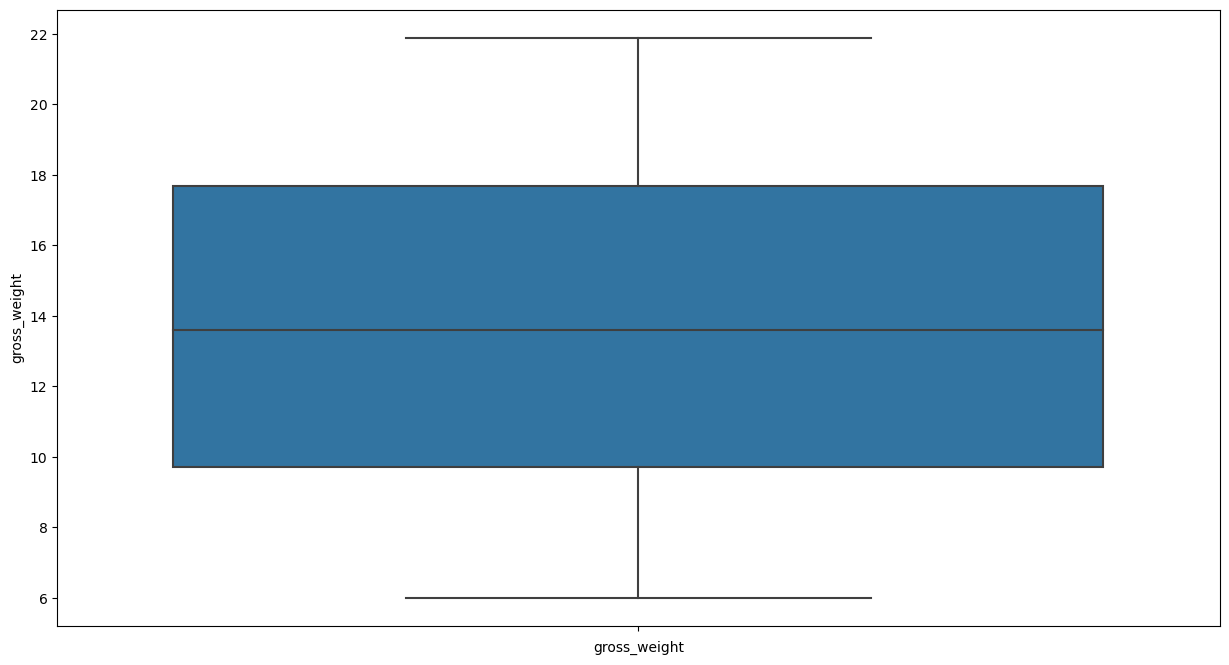

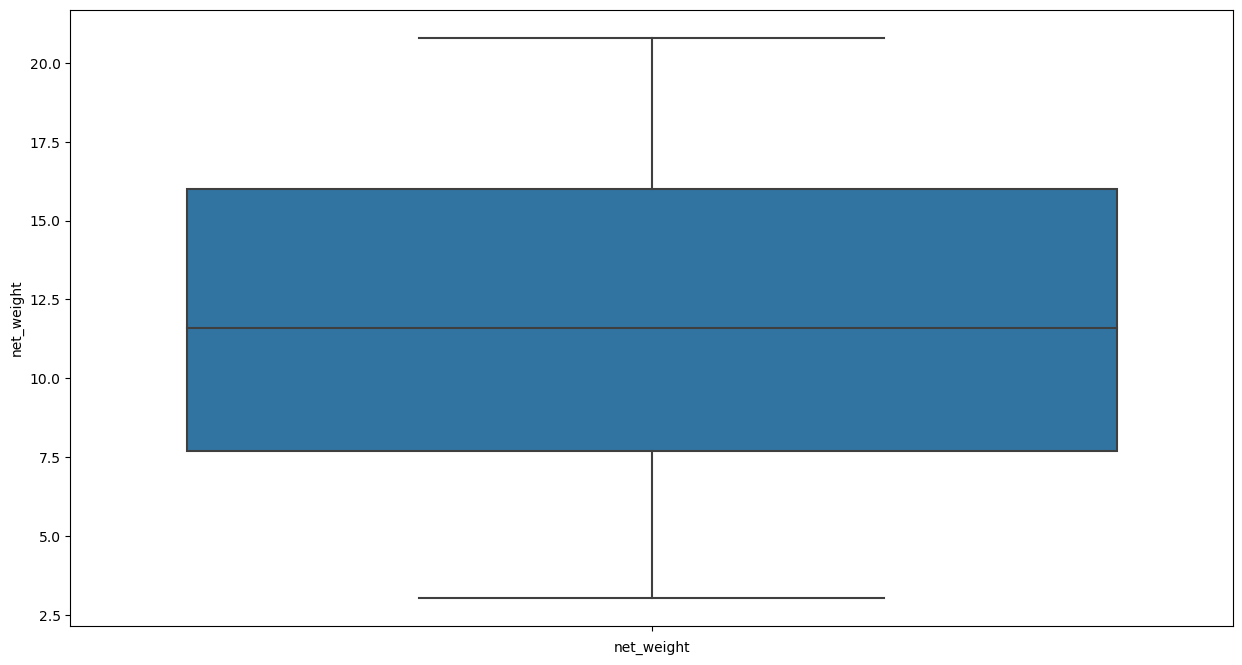

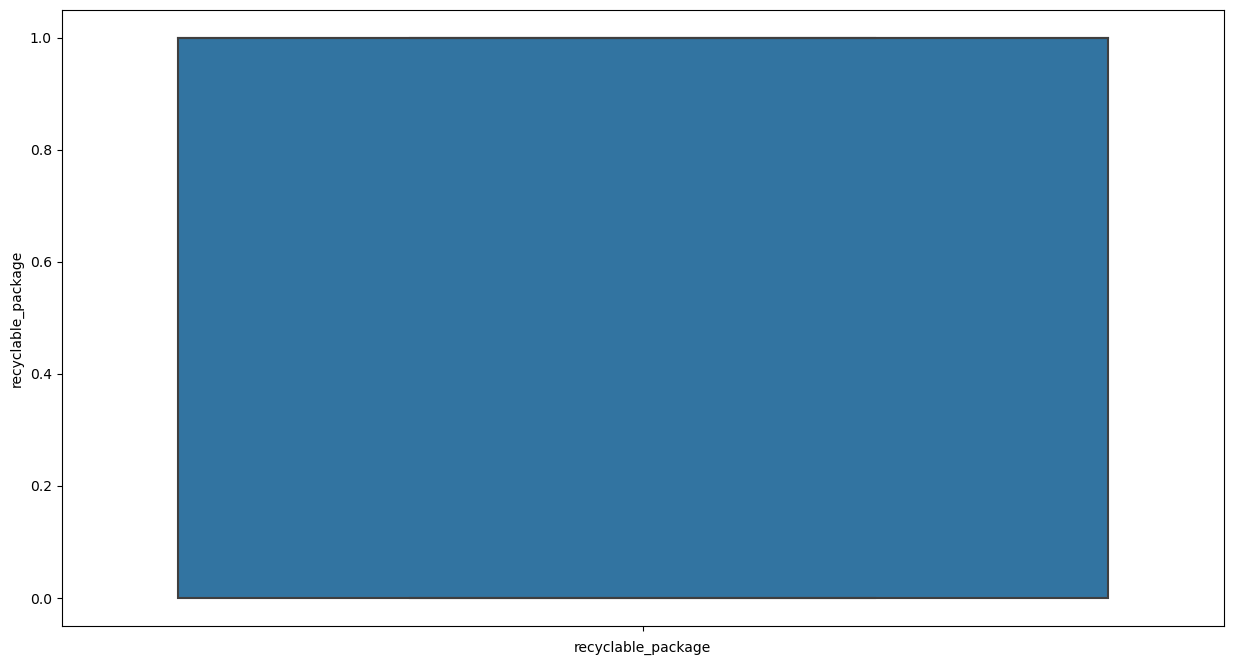

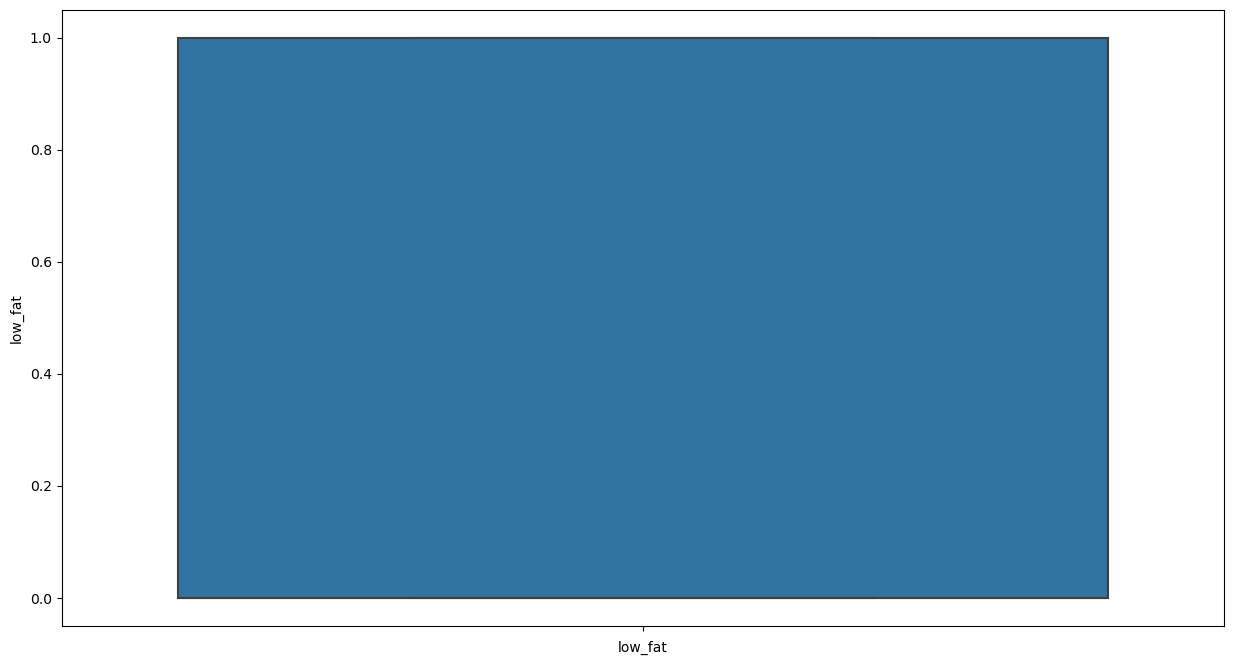

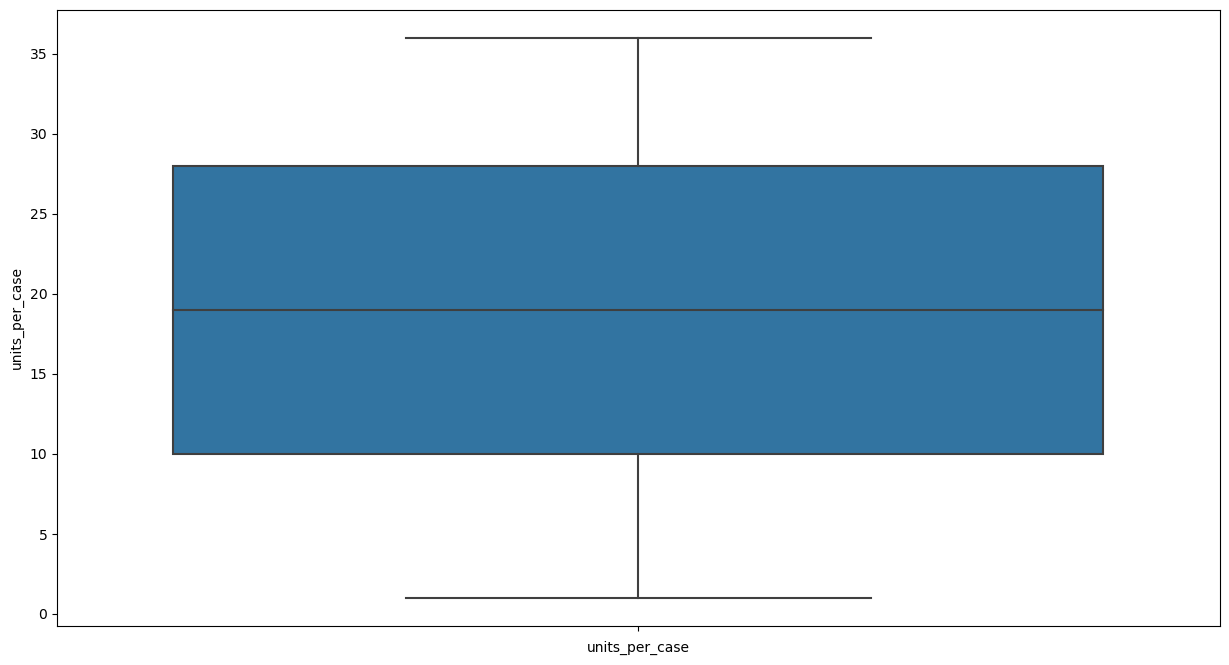

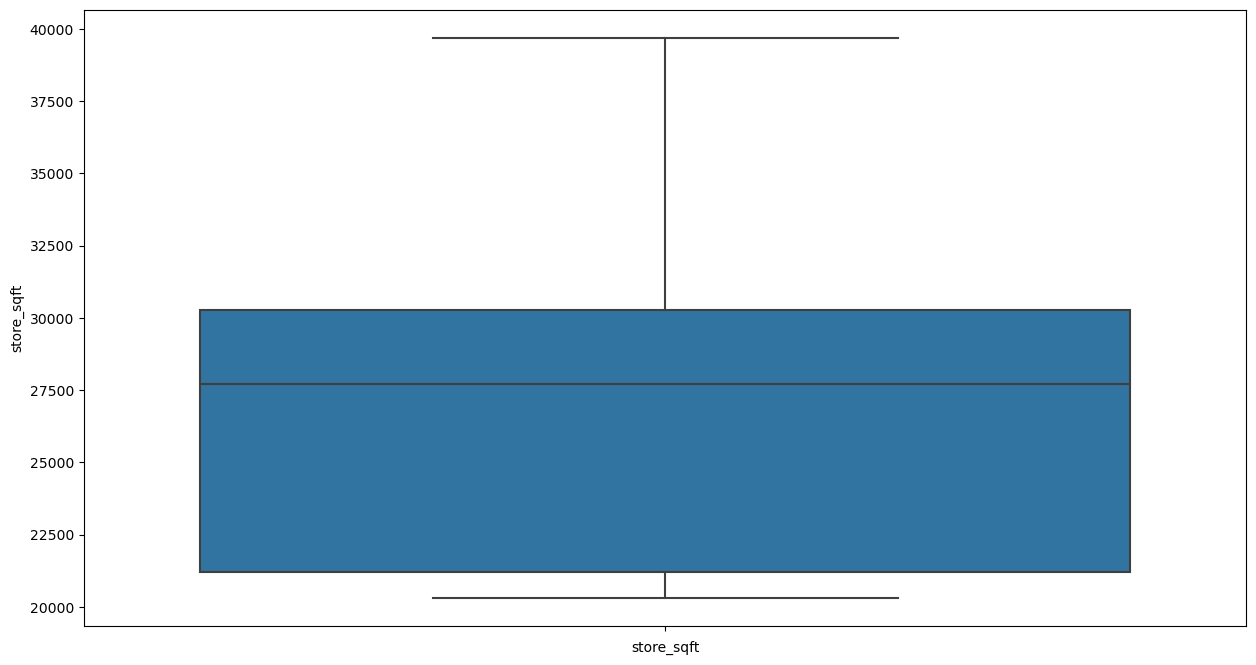

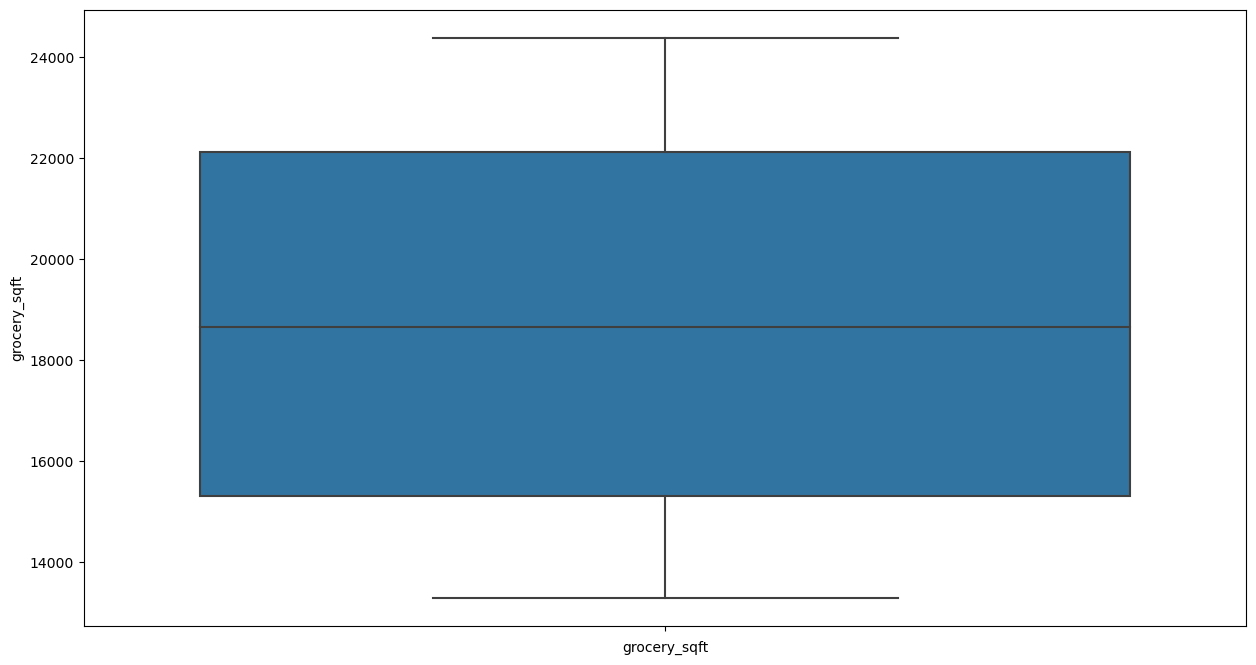

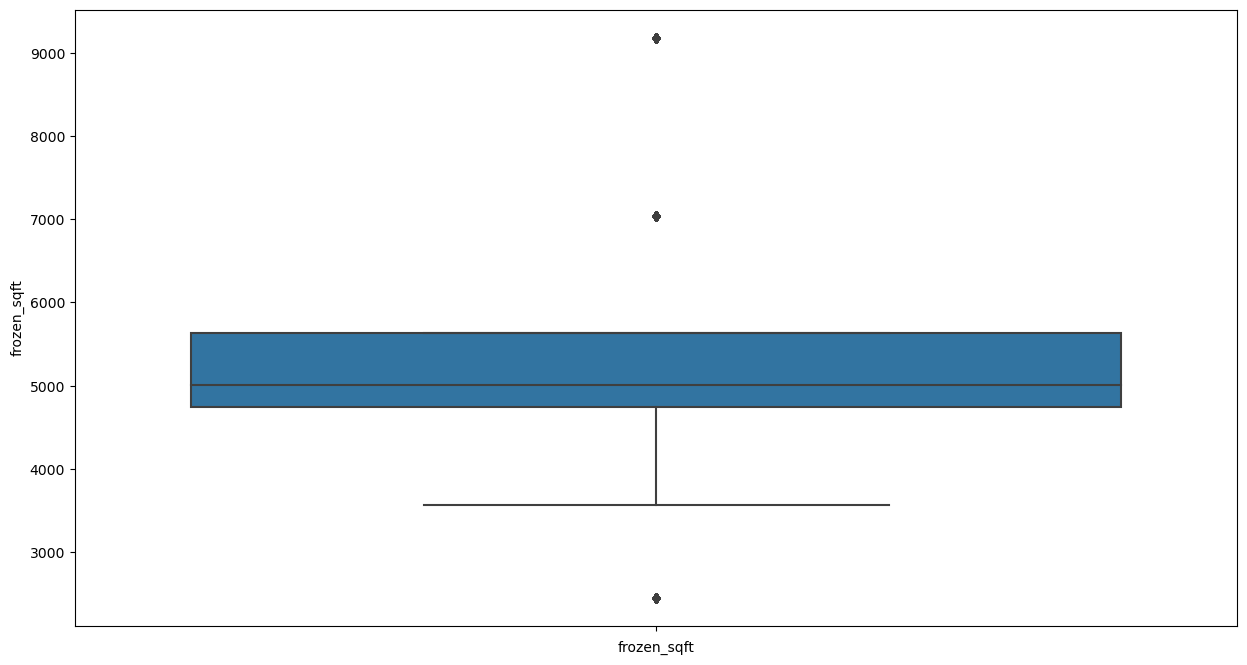

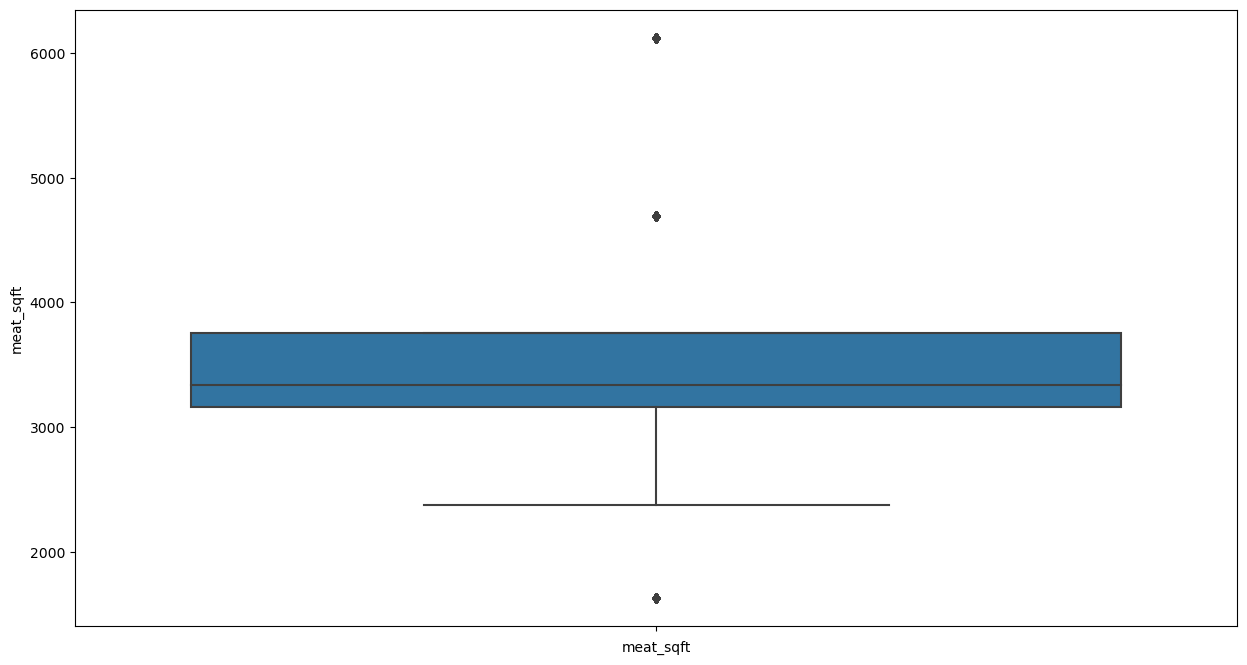

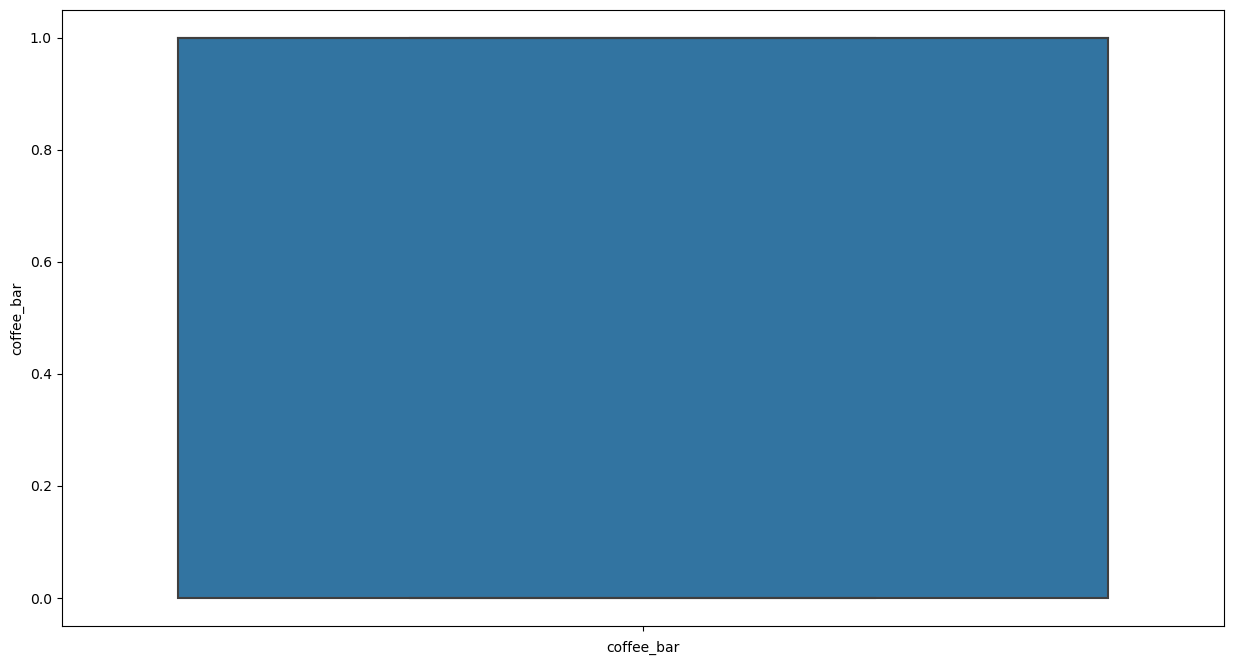

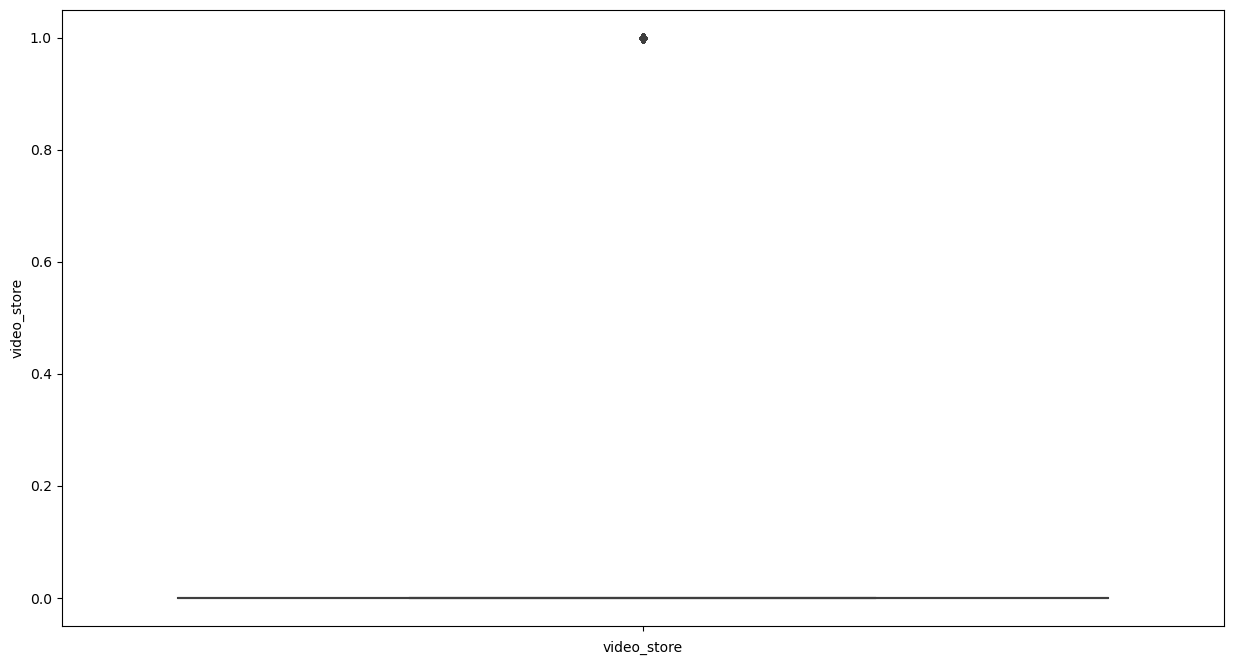

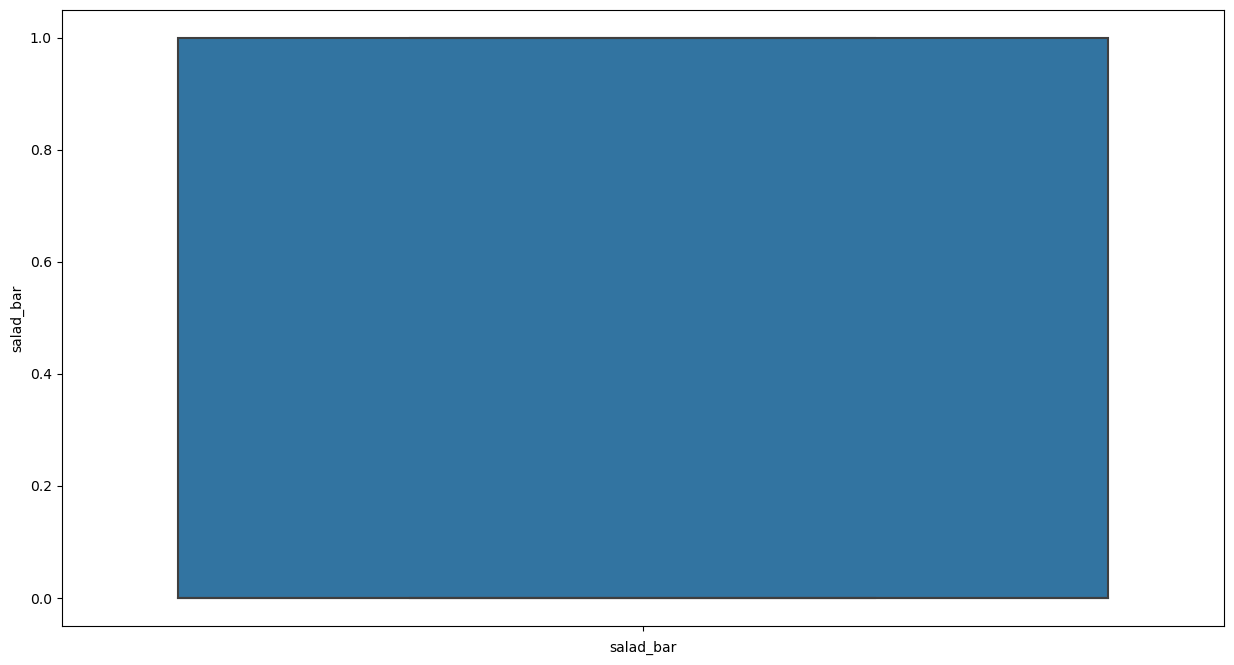

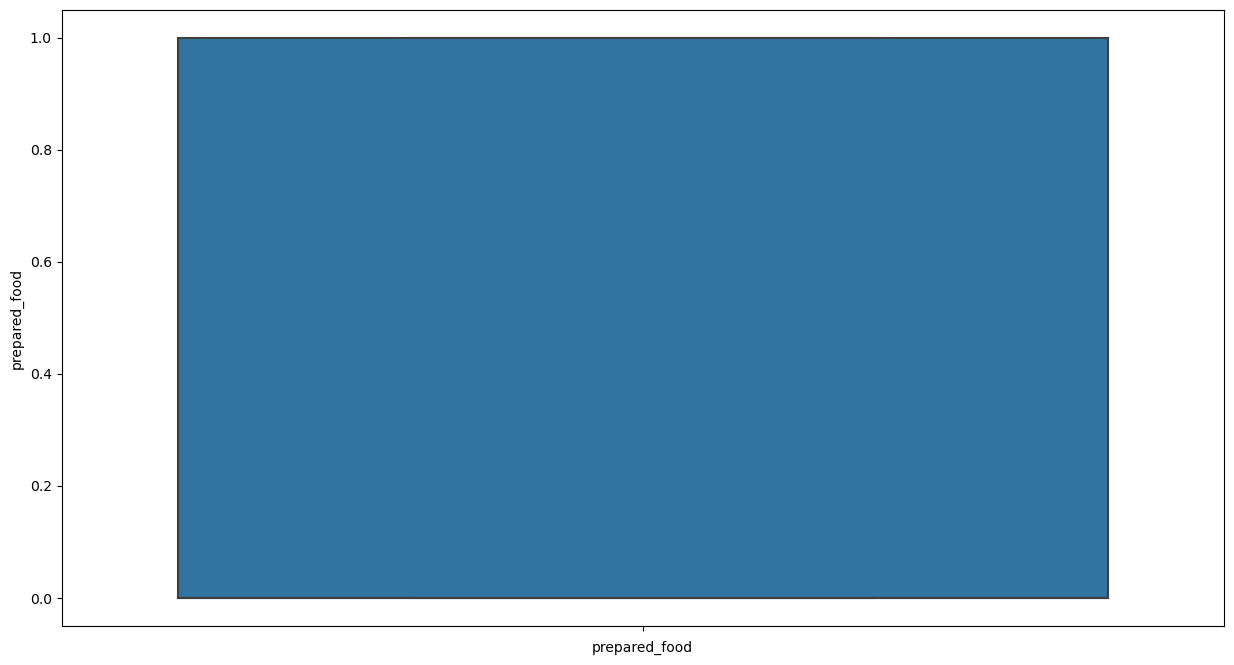

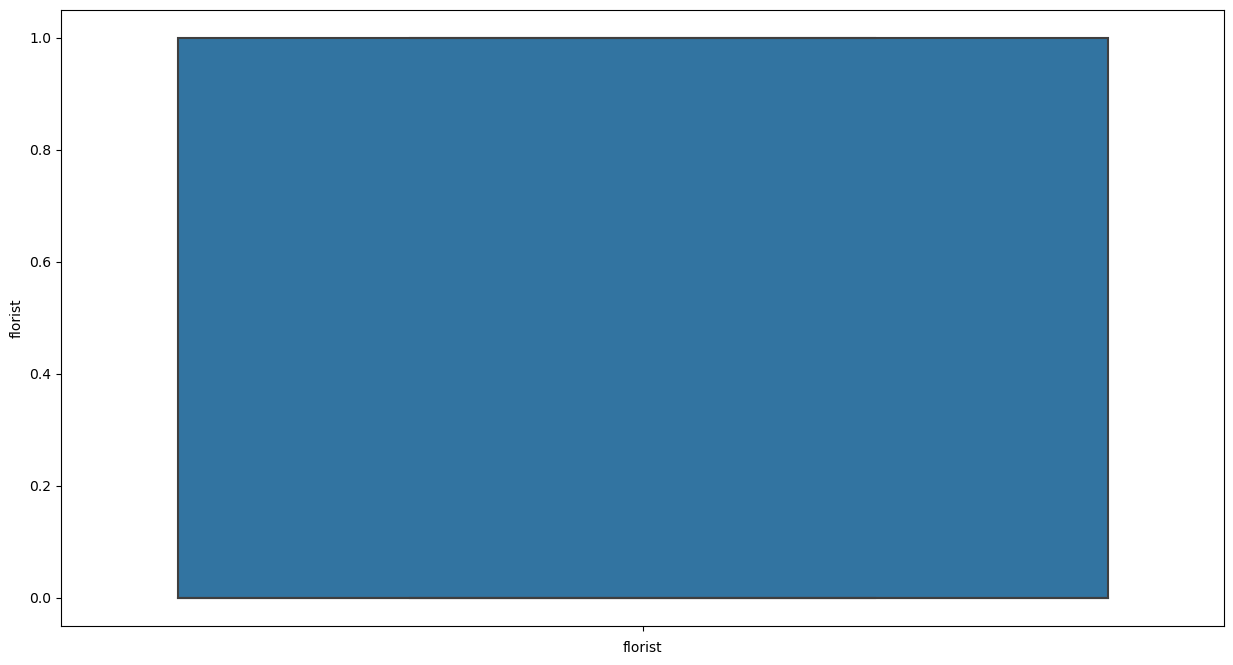

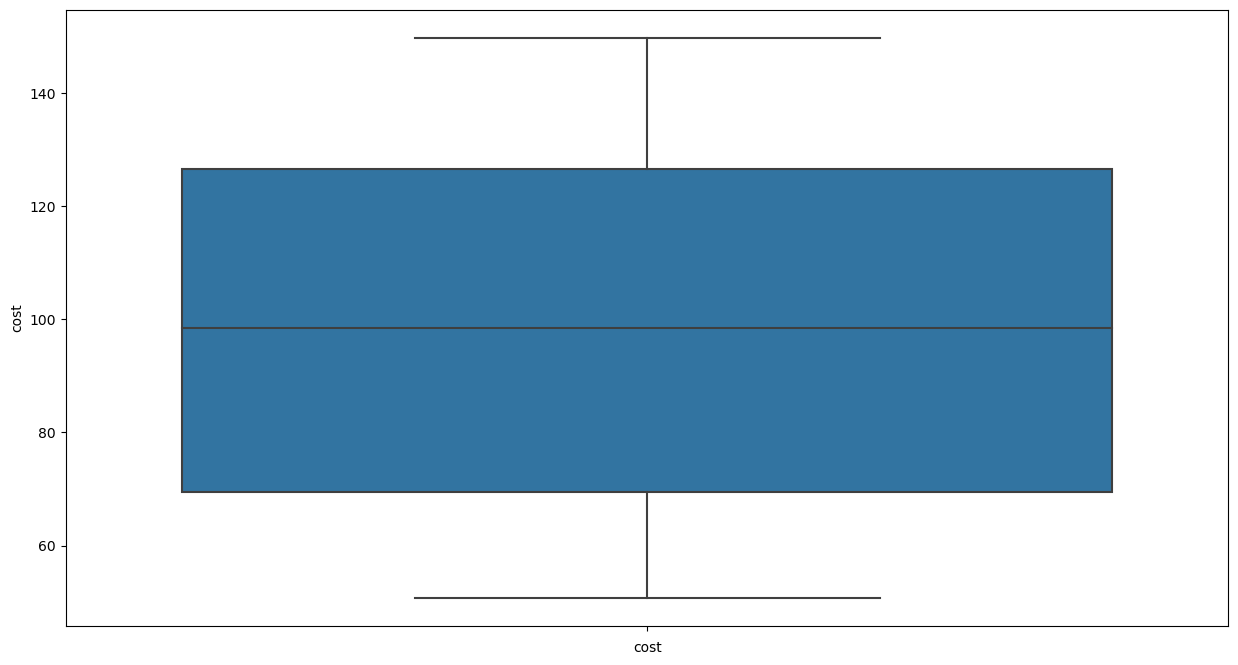

In [13]:

for col in usdf_num.columns:
    sns.boxplot(y=usdf_num[col])
    plt.xlabel(col)
    plt.show()

In [14]:
Q1 = usdata.quantile(0.25)
Q3 = usdata.quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

cols=usdata.select_dtypes(include=np.number).columns.to_list()

usdata[cols] = np.where(usdata[cols]>upper_limit,upper_limit,np.where(usdata[cols]<lower_limit,lower_limit,usdata[cols]))

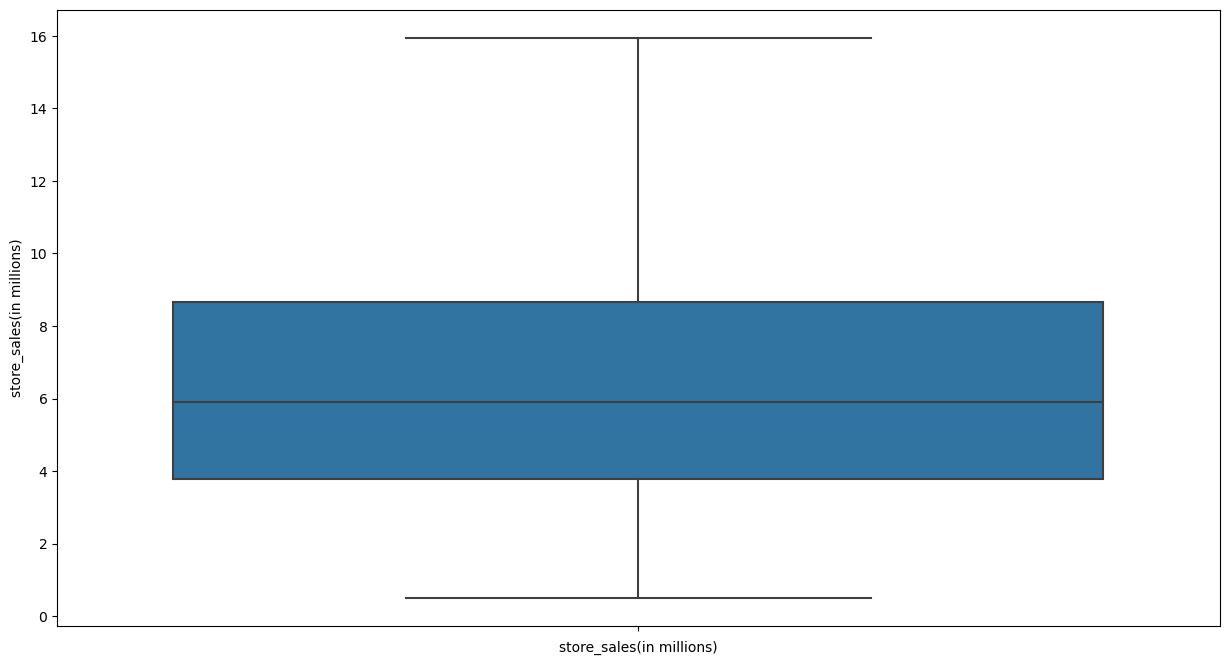

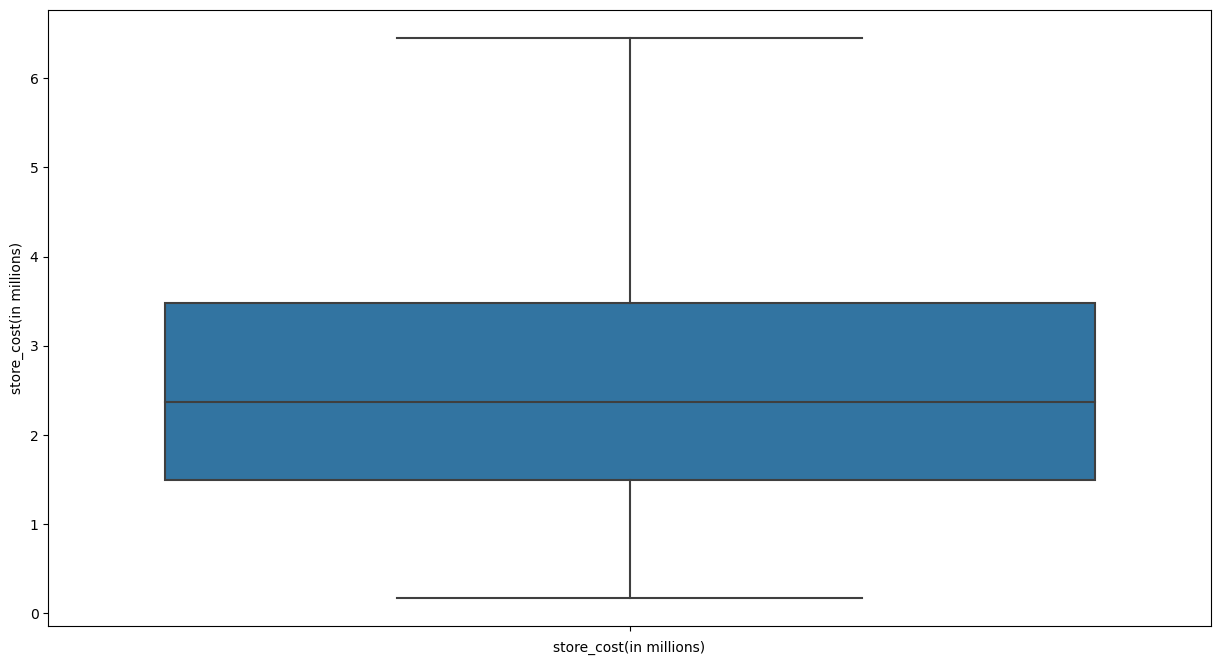

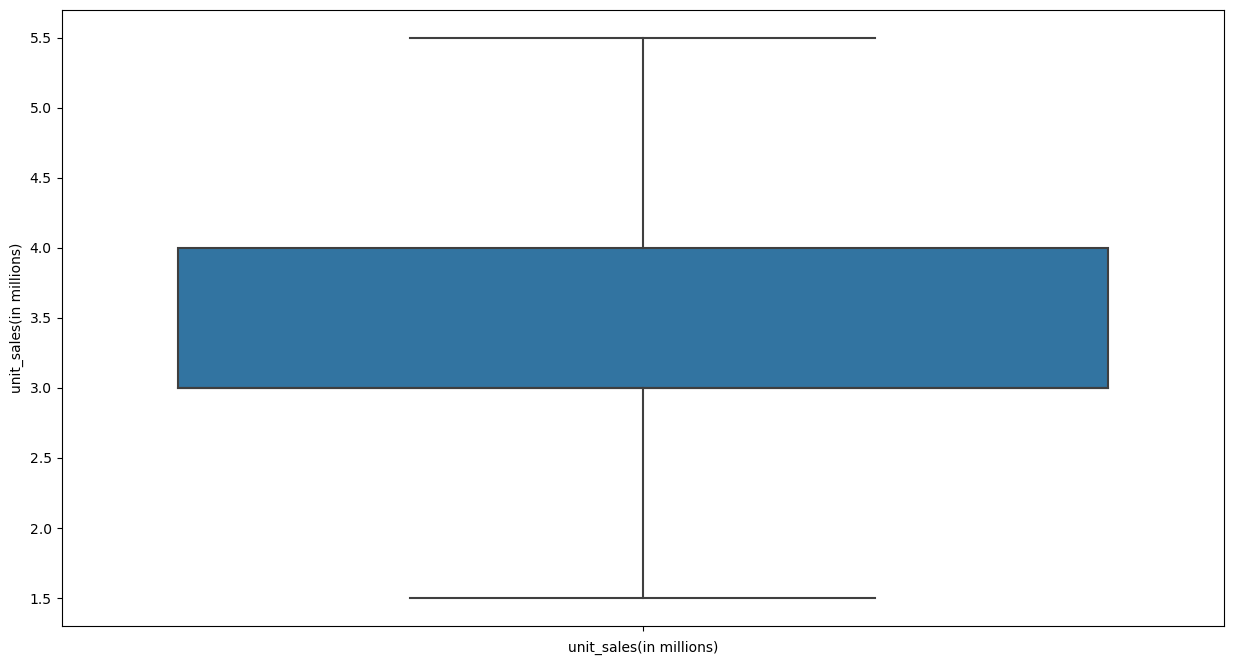

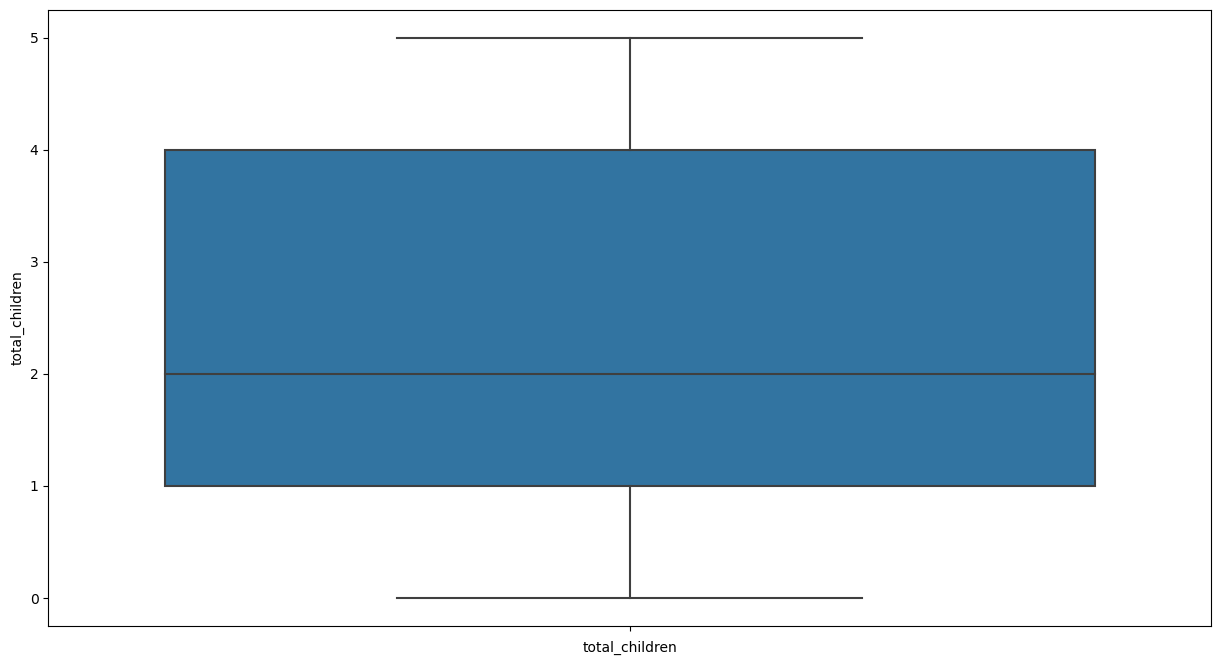

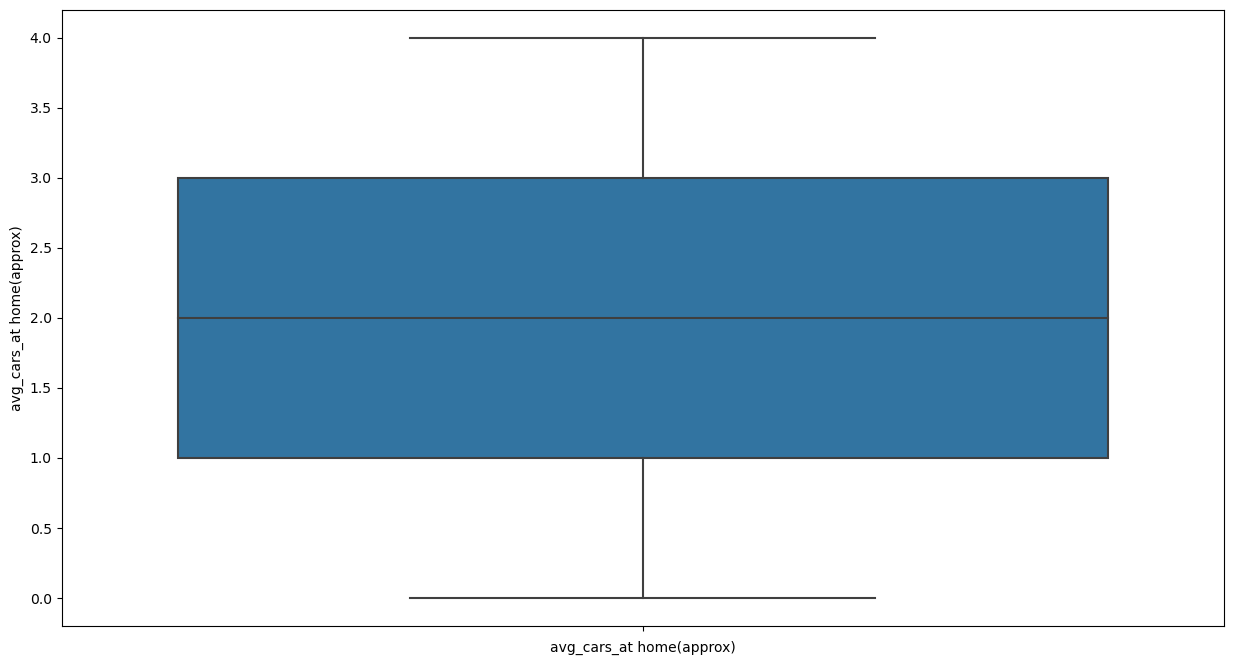

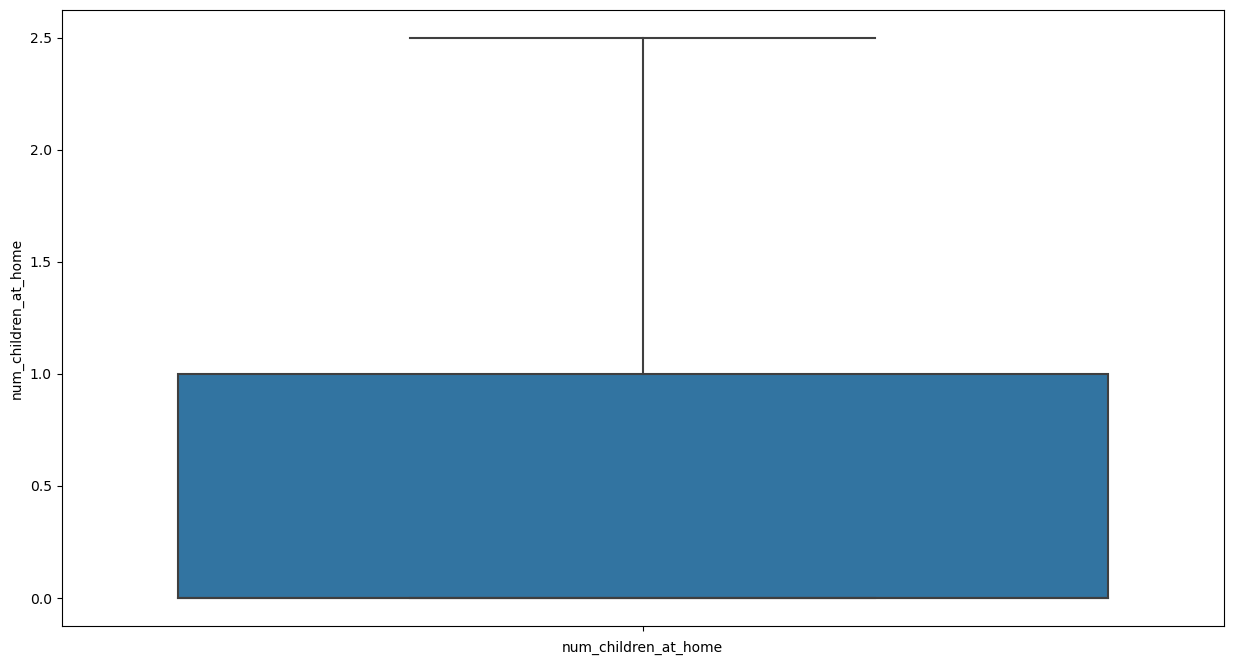

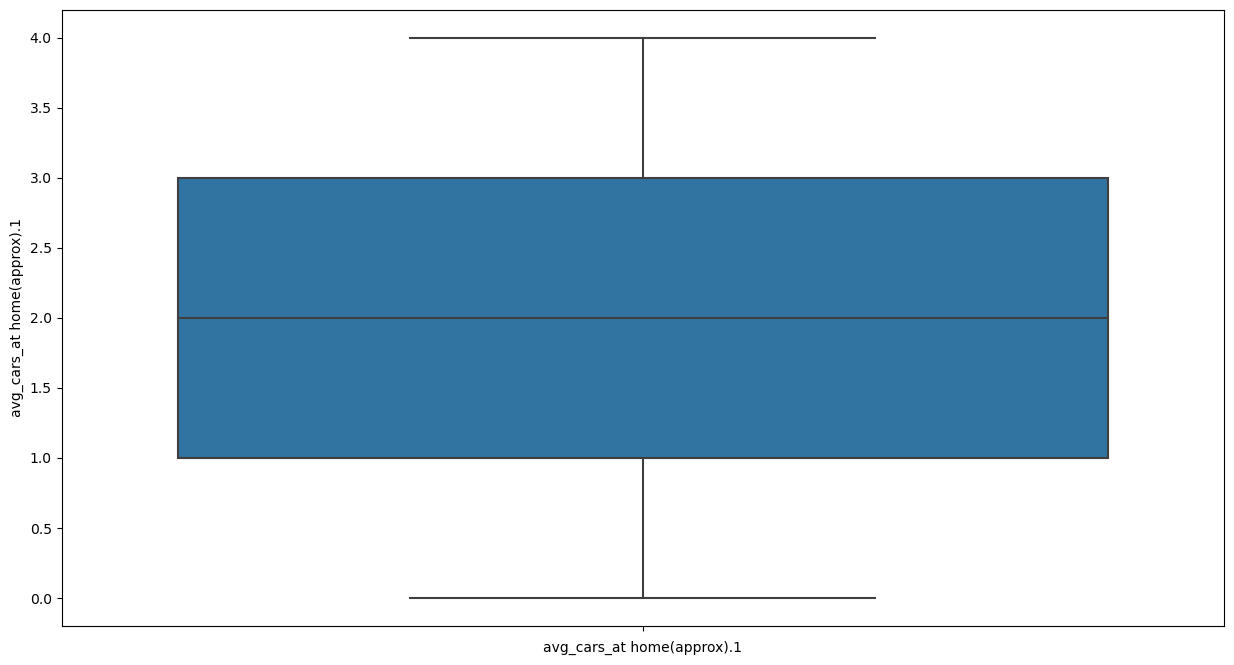

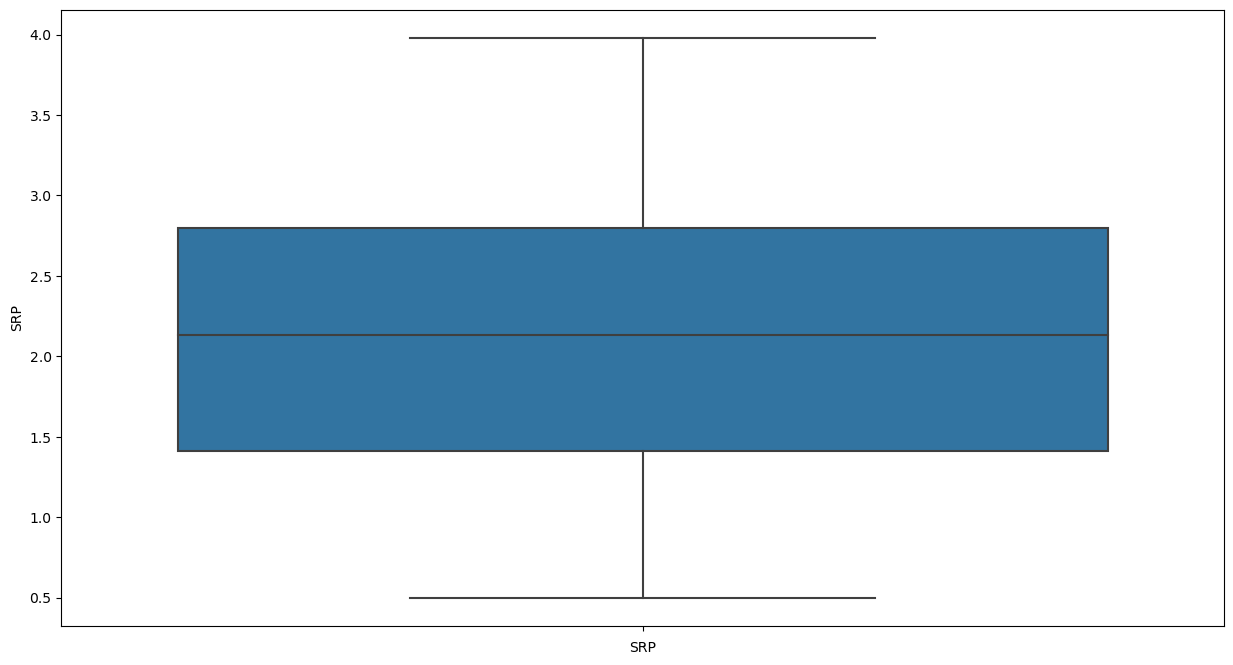

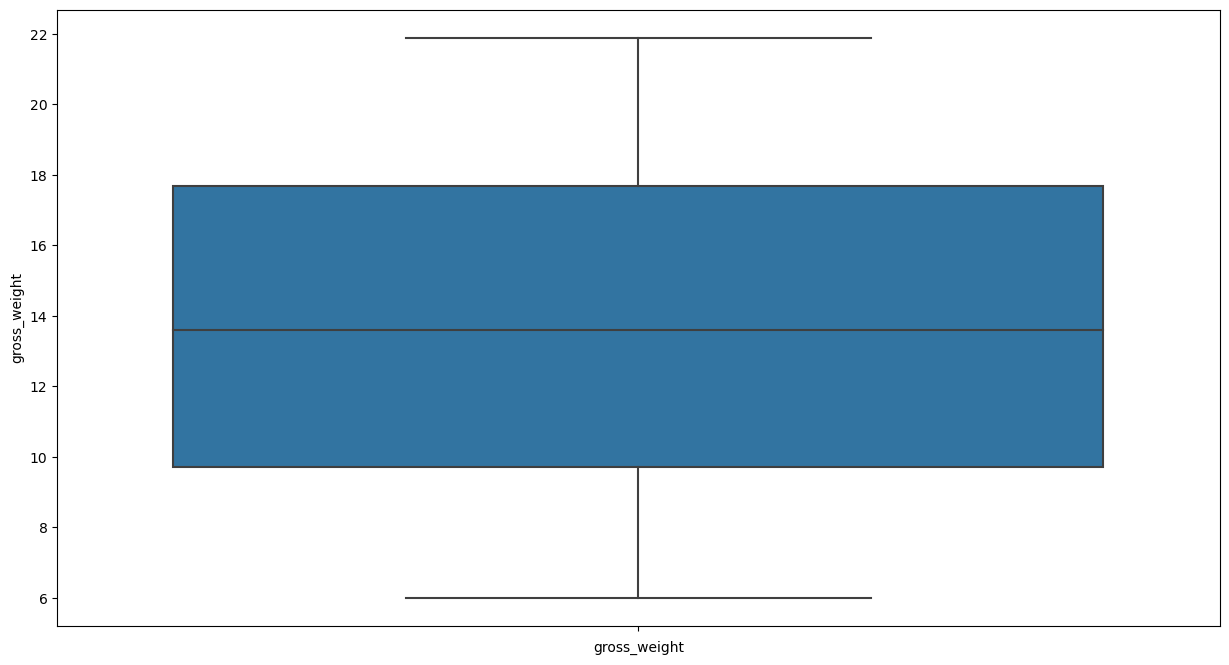

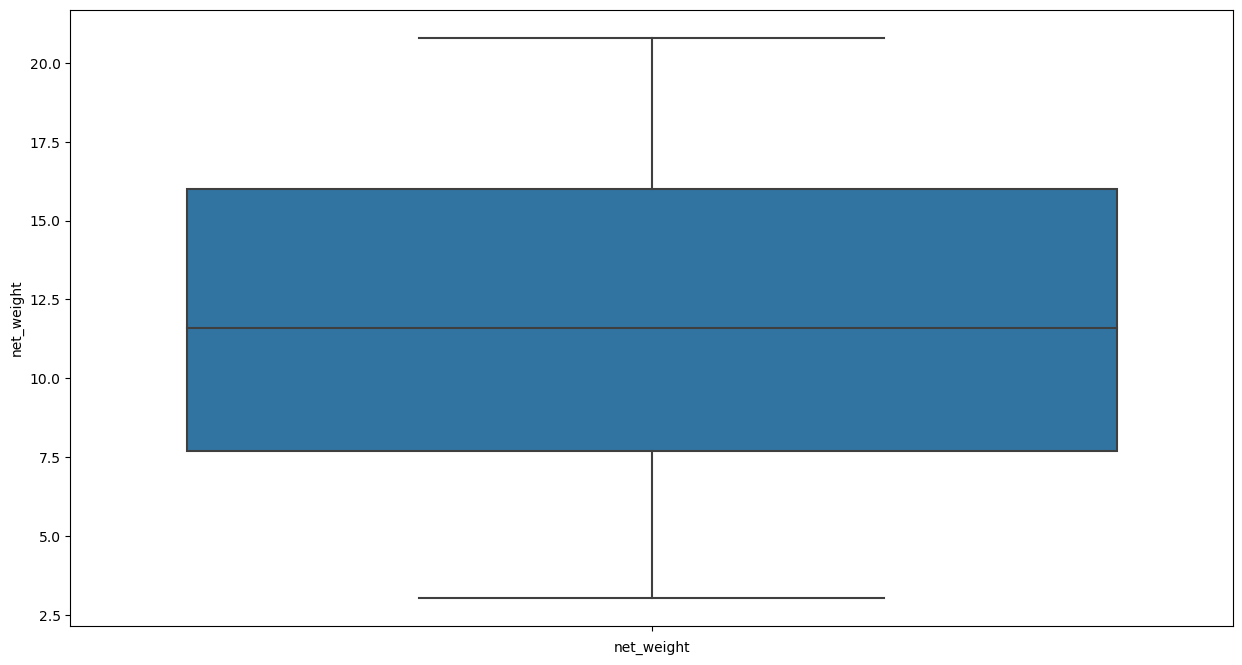

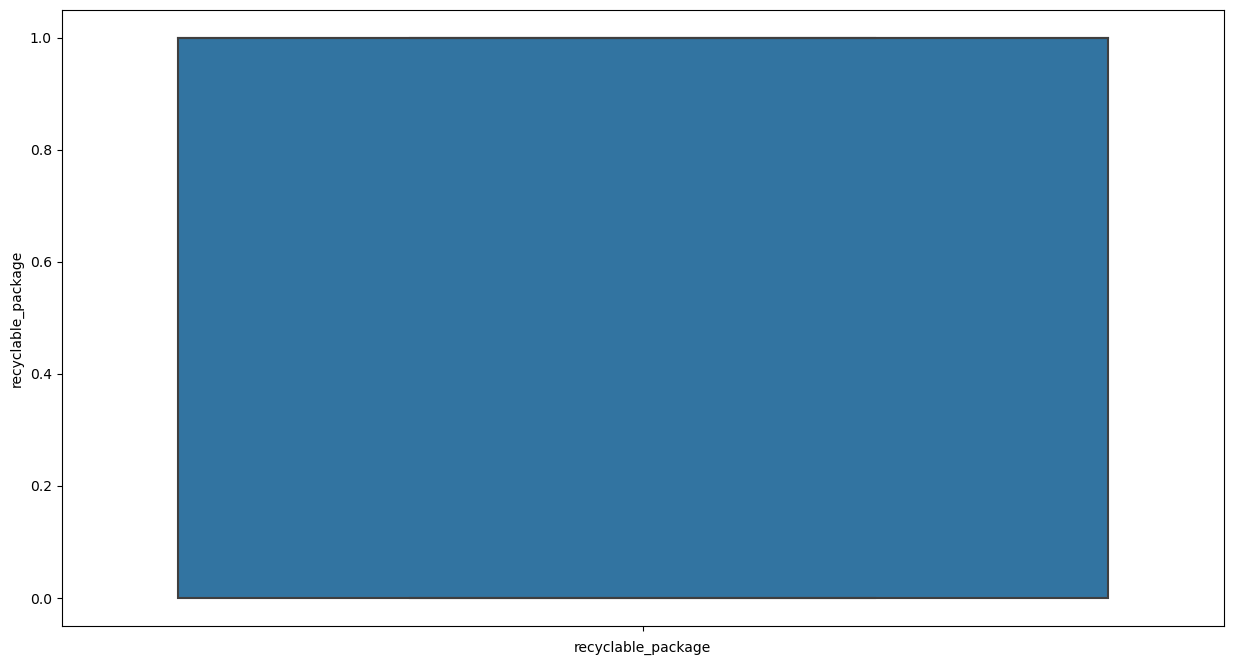

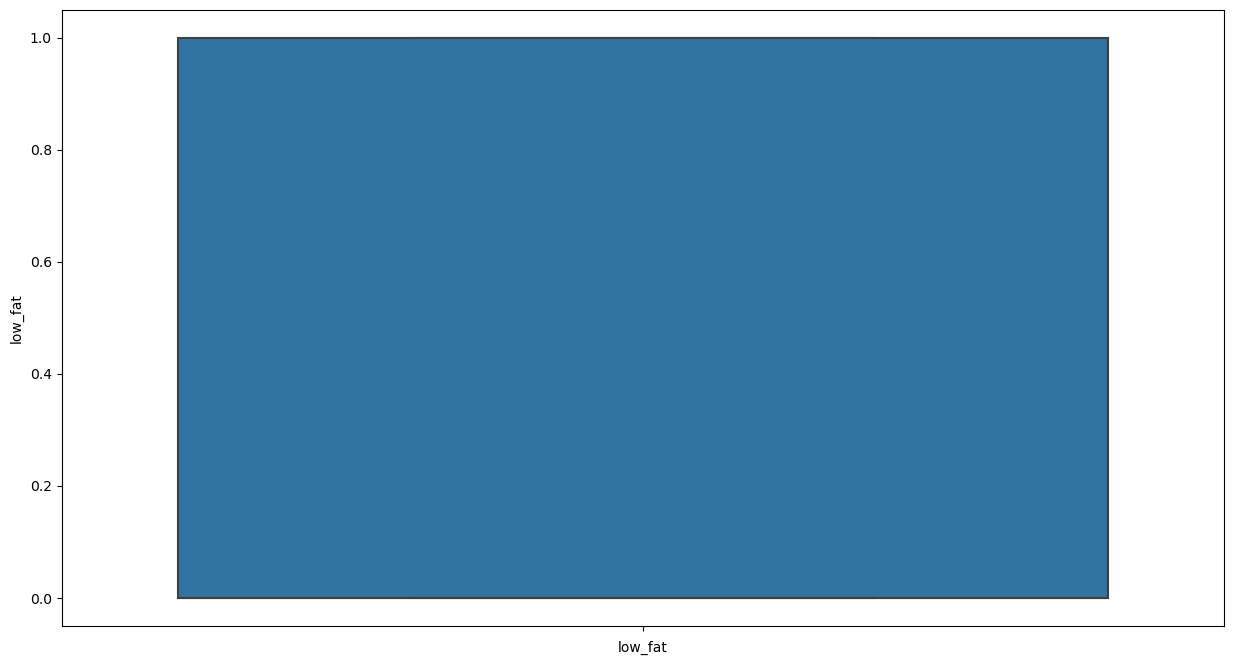

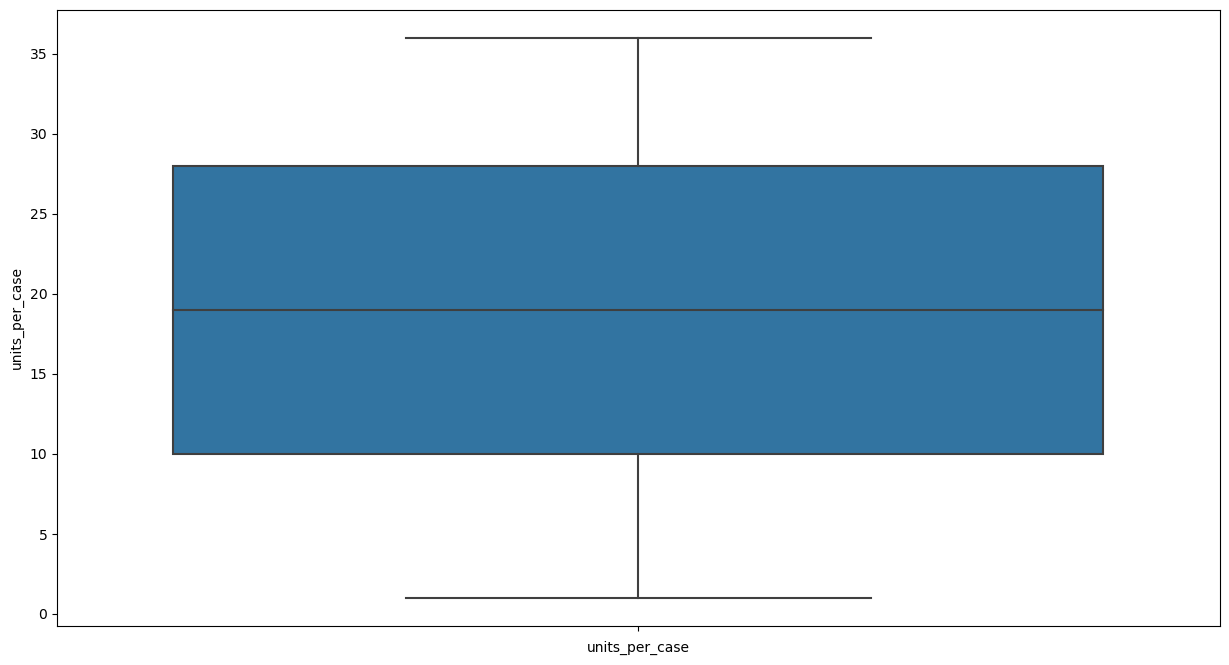

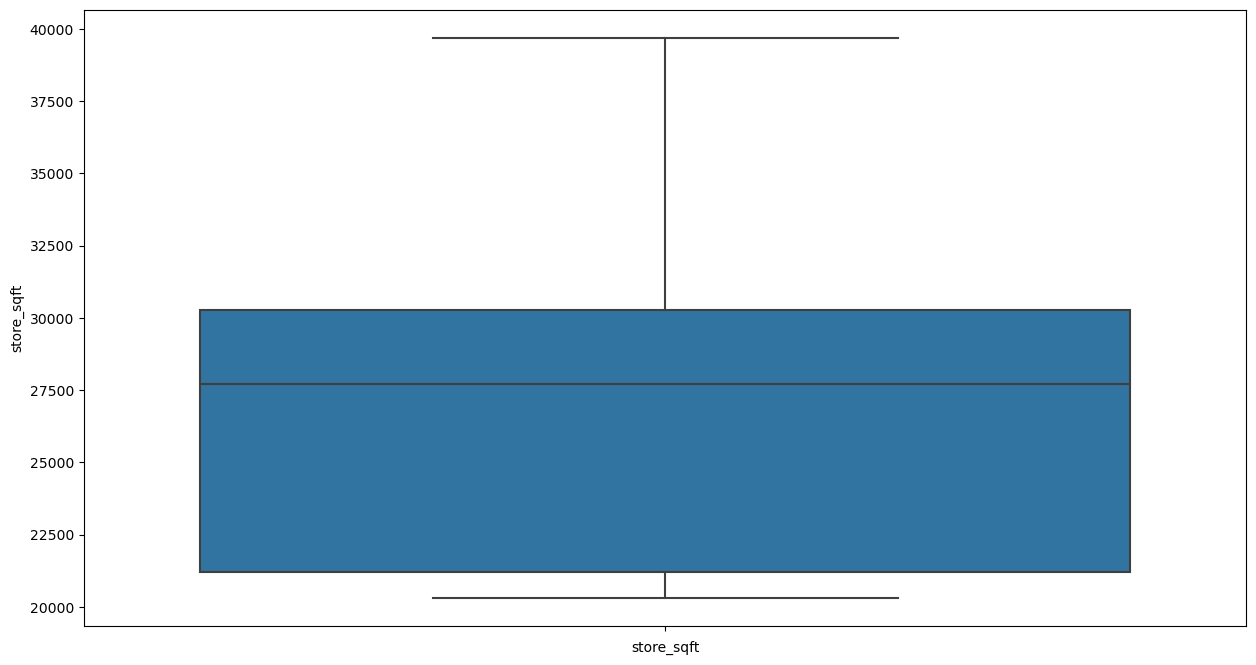

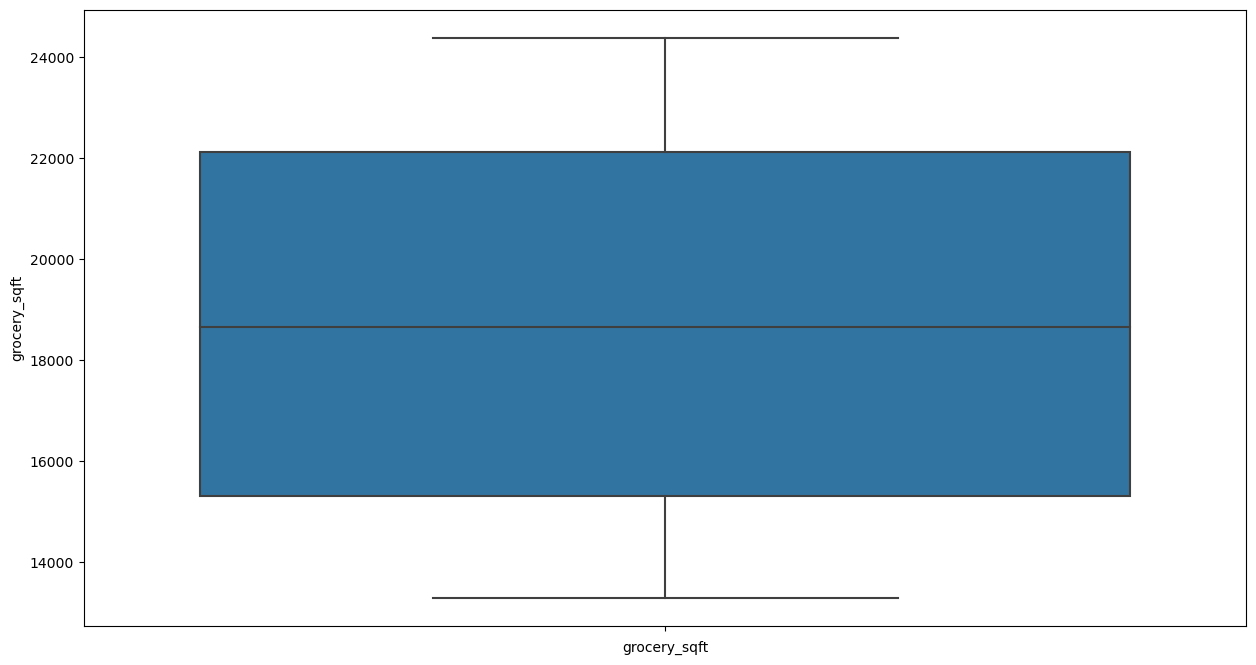

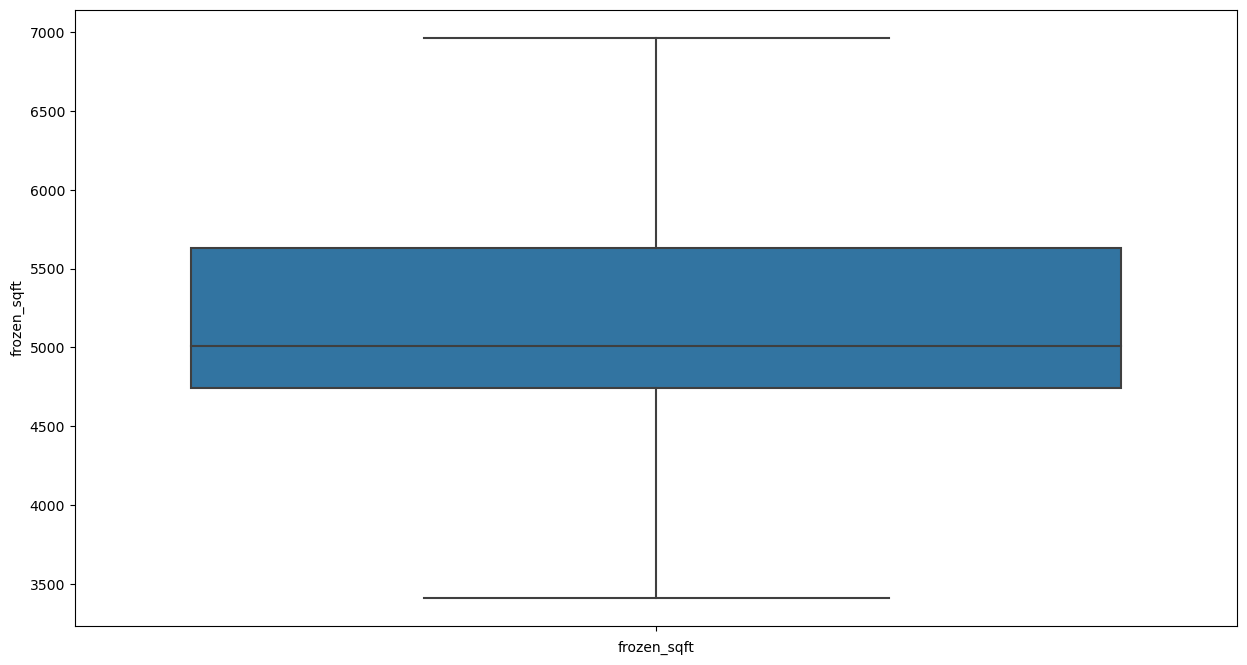

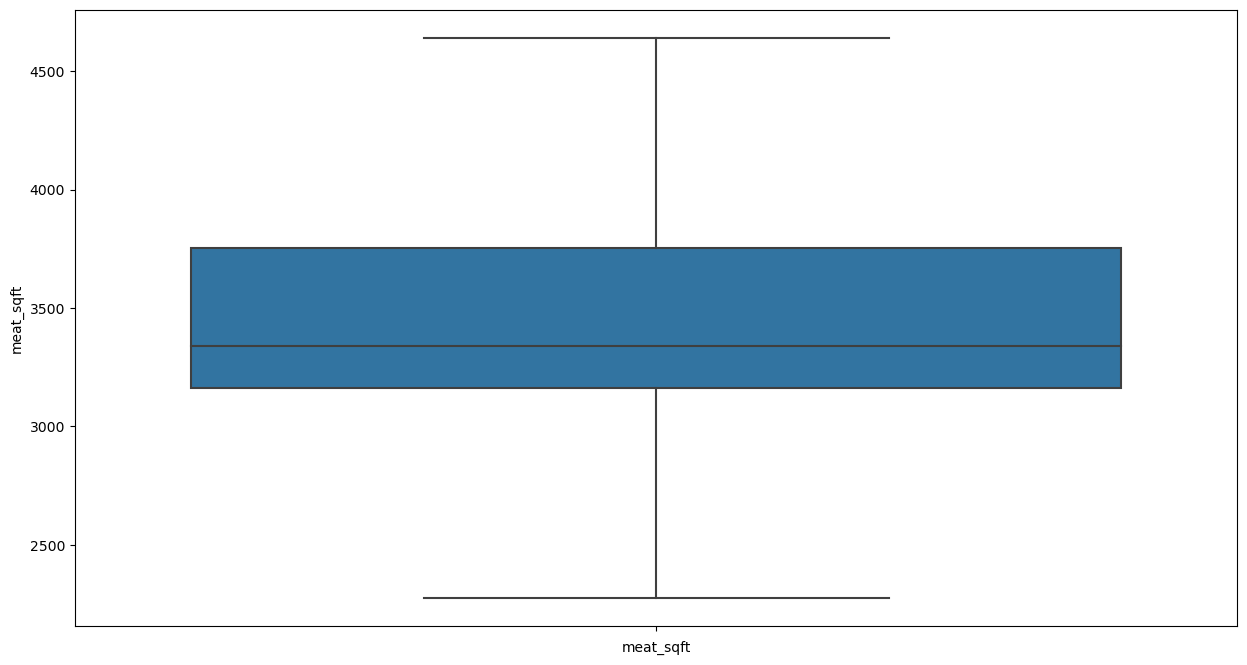

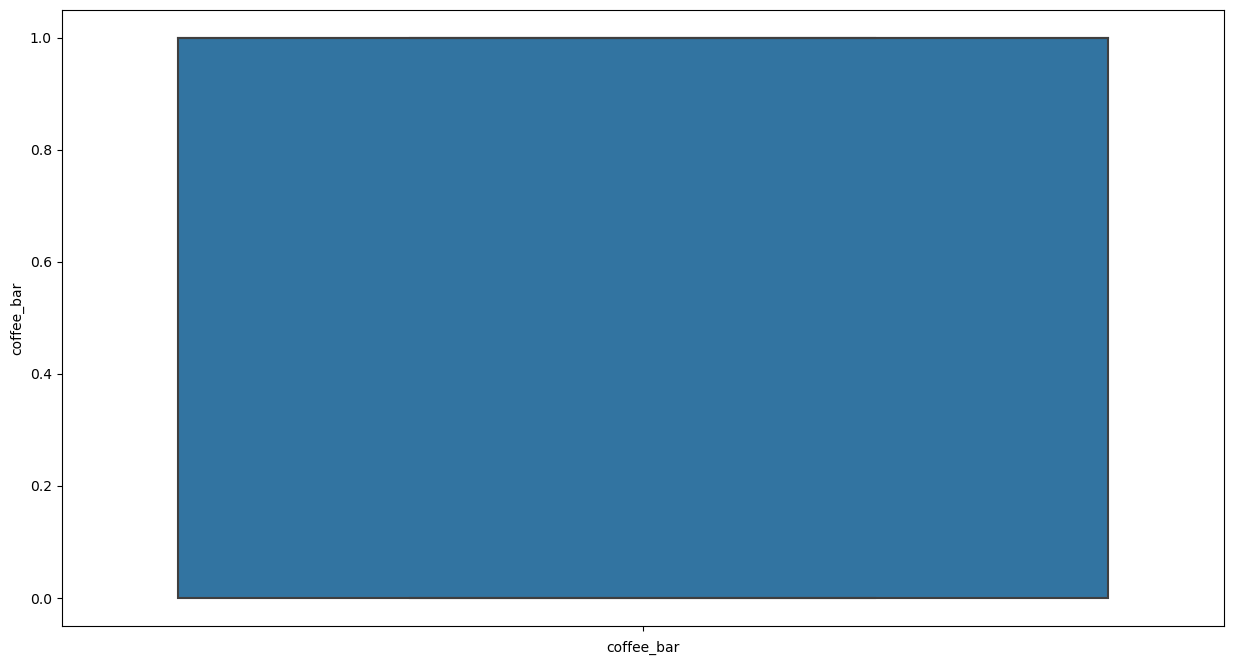

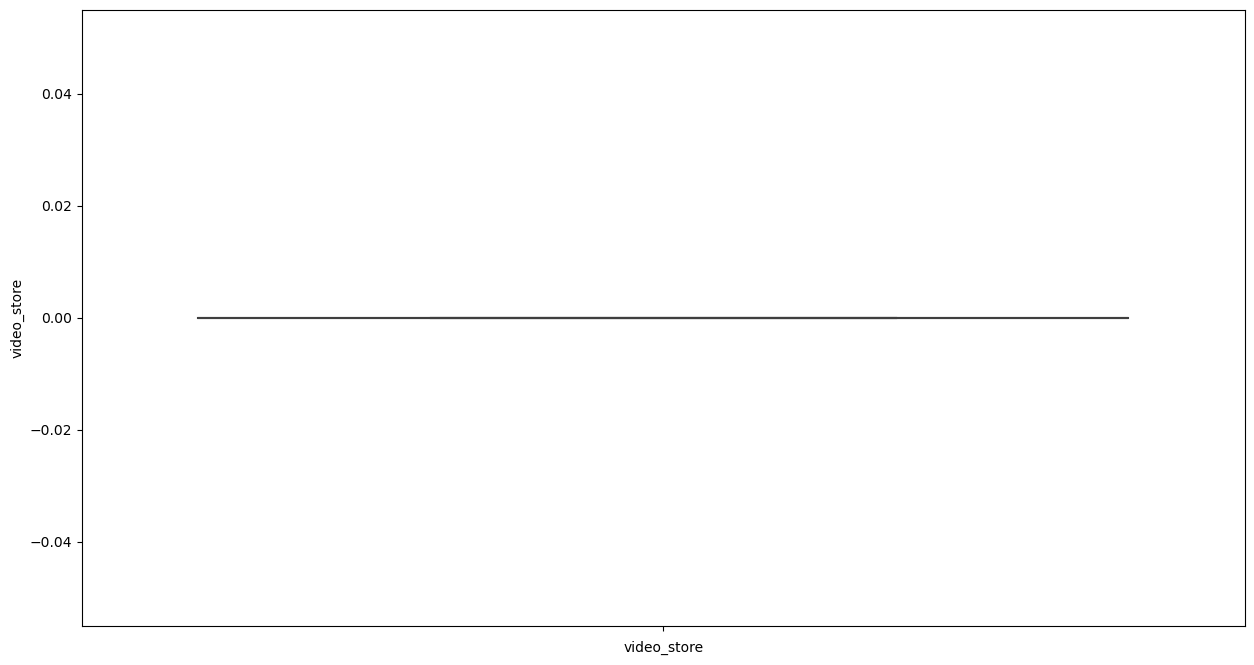

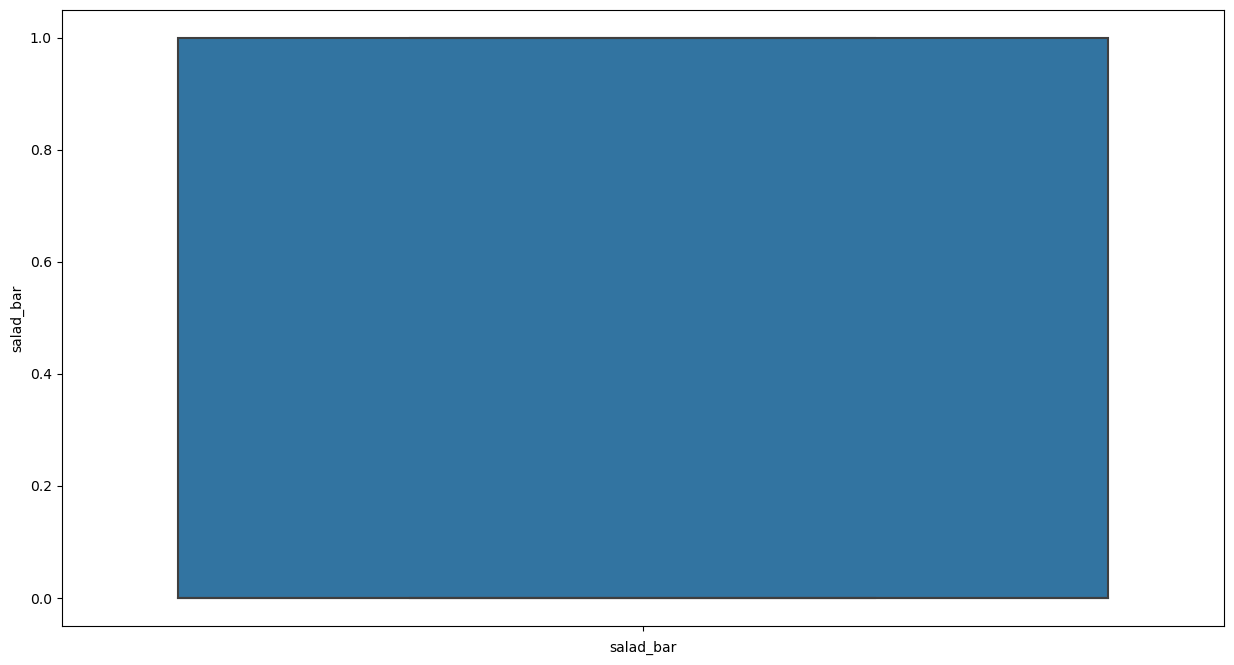

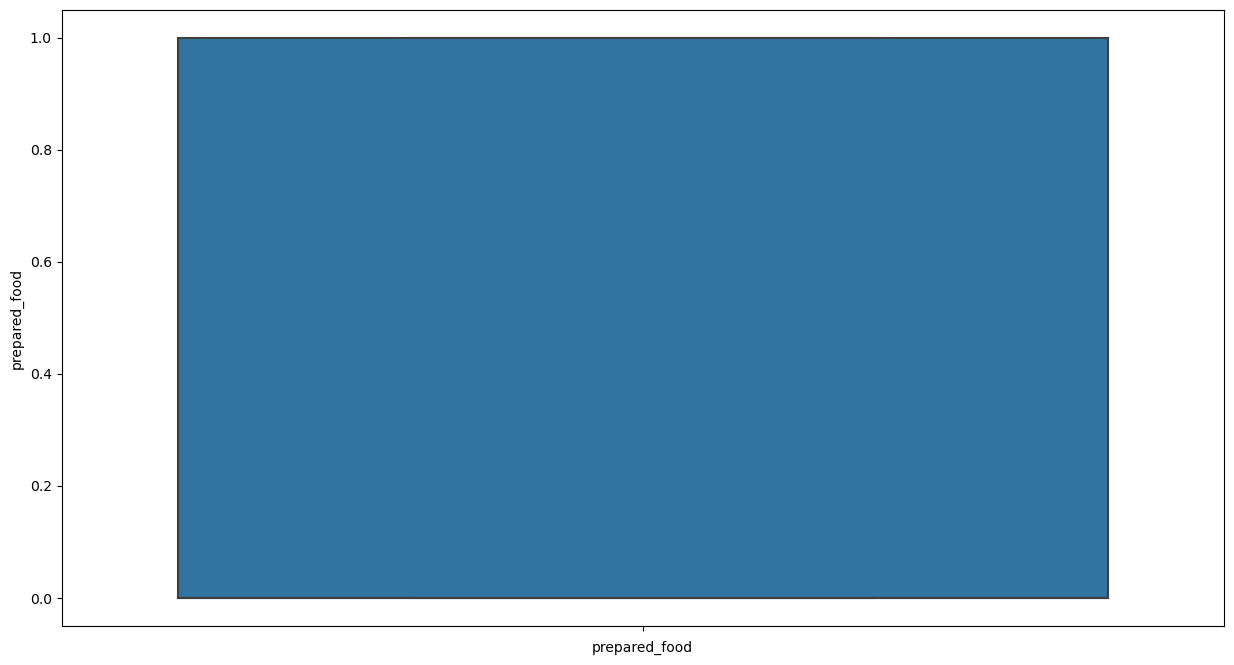

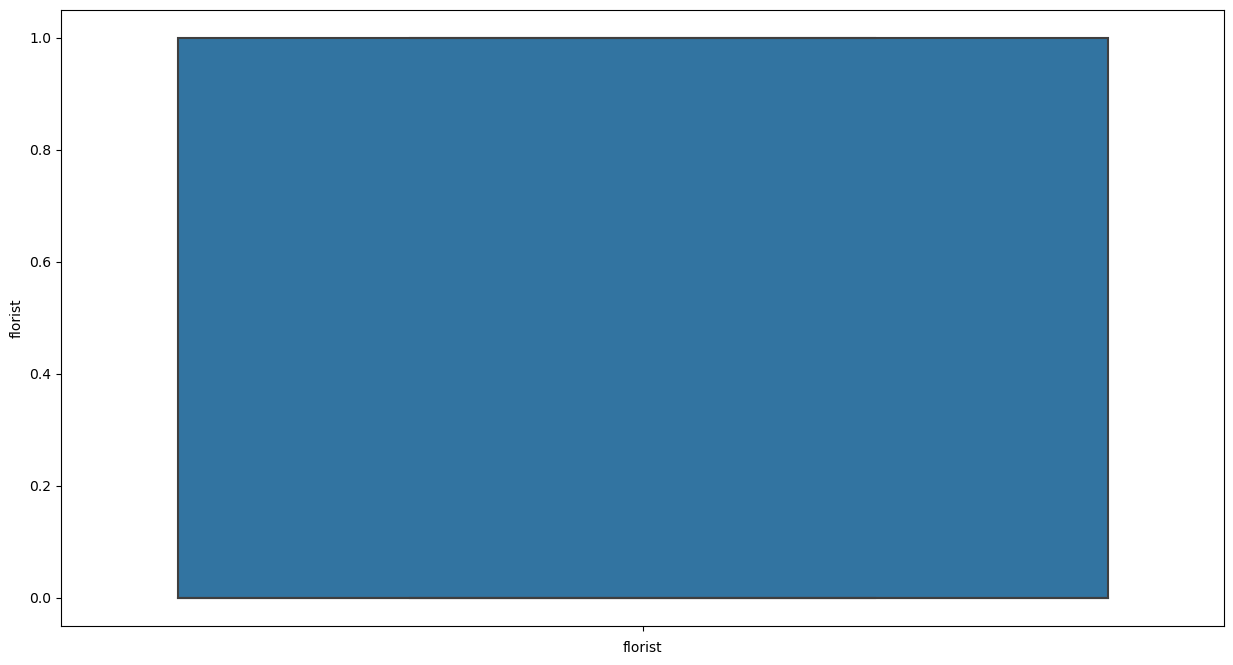

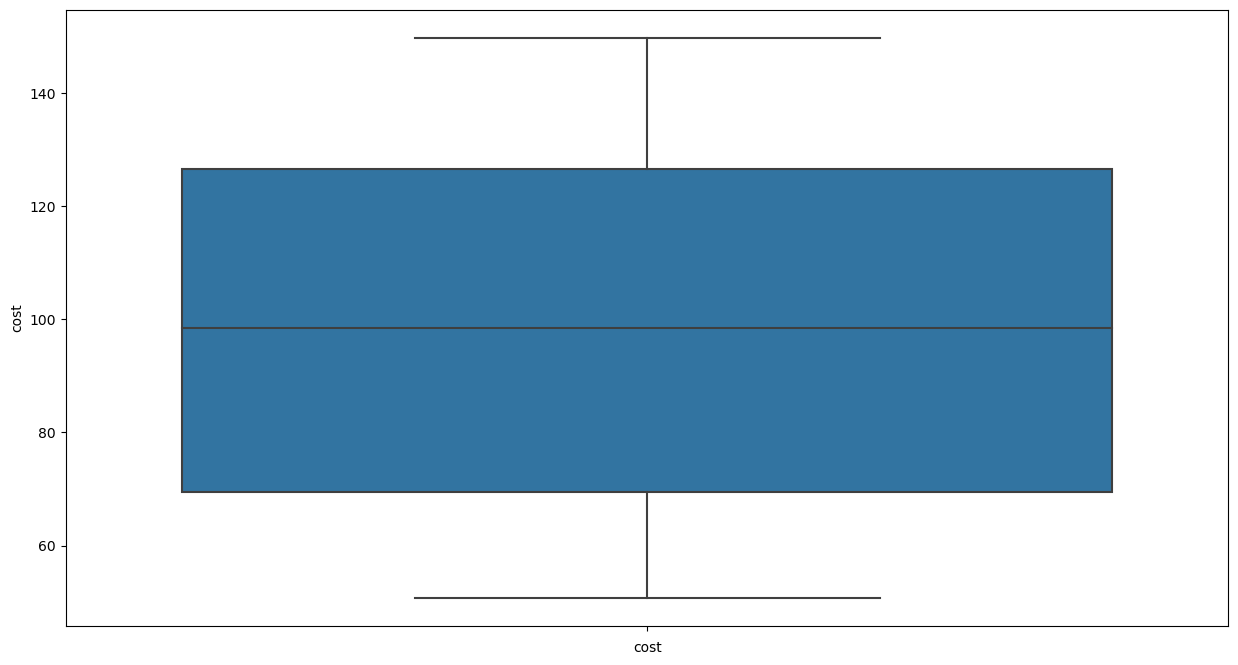

In [17]:
for col in usdata.select_dtypes(include=np.number).columns:
    sns.boxplot(y=usdata[col])
    plt.xlabel(col)
    plt.show()

In [18]:
usdata.shape

(38892, 40)

# Dummy Encoding

In [20]:
usdata_dummy_encoded = pd.get_dummies(usdata,drop_first=True)

In [21]:
usdata_dummy_encoded.shape

(38892, 295)

# Label Encoding

In [22]:
usdata_label_encoded = usdata.copy()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
uscat=usdata.select_dtypes(exclude=np.number).columns.to_list()

In [25]:
for columns in uscat:
    usdata_label_encoded[columns] = le.fit_transform(usdata_label_encoded[columns])

In [26]:
usdata_label_encoded.shape

(38892, 40)

In [27]:
usdata_label_encoded.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,4,12,1,7.36,2.7232,4.0,0,0,0,0,...,18670.0,5415.0,3610.0,1.0,0.0,1.0,1.0,1.0,3,126.62
1,4,12,1,5.52,2.5944,3.0,6,0,0,1,...,18670.0,5415.0,3610.0,1.0,0.0,1.0,1.0,1.0,3,59.86
2,4,12,1,3.68,1.3616,2.0,18,0,1,0,...,18670.0,5415.0,3610.0,1.0,0.0,1.0,1.0,1.0,3,84.16
3,4,12,1,3.68,1.1776,2.0,6,0,0,0,...,18670.0,5415.0,3610.0,1.0,0.0,1.0,1.0,1.0,5,95.78
4,4,12,1,4.08,1.4280,3.0,11,0,0,1,...,18670.0,5415.0,3610.0,1.0,0.0,1.0,1.0,1.0,7,50.79


In [28]:
usdata.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,0.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,0.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,0.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,0.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,0.0,1.0,1.0,1.0,Radio,50.79


# Mean Encoding

In [29]:
data1 = {
    'category': ['A', 'B', 'A', 'B', 'C', 'A', 'C'],
    'target': [1, 2, 1, 3, 2, 3, 4]
}

In [30]:
df1 = pd.DataFrame(data1)

In [31]:
mean_encoding = df1.groupby('category')['target'].mean()

In [32]:
mean_encoding

category
A    1.666667
B    2.500000
C    3.000000
Name: target, dtype: float64

In [33]:
mean_encoding_dict = mean_encoding.to_dict()

In [34]:
df1['category_mean_encoded'] = df1['category'].map(mean_encoding_dict)

In [35]:
df1.head()

,category,target,category_mean_encoded
0,A,1,1.666667
1,B,2,2.500000
2,A,1,1.666667
3,B,3,2.500000
4,C,2,3.000000


In [43]:
usdata2 = usdata.copy()

In [48]:
catcol = usdata2.select_dtypes(exclude=np.number).columns.to_list()

In [49]:
for column in catcol:
    mean_encoding = usdata2.groupby(column)['cost'].mean()
    mean_encoding_dict = mean_encoding.to_dict()
    usdata2[column] = usdata2[column].map(mean_encoding_dict)

In [50]:
usdata2.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,98.758225,98.83714,98.617863,102.343165,105.733636,97.706918,106.044365,98.40235,98.211345,98.686830,...,84.43012,84.43012,84.43012,97.050583,98.40235,94.94454,94.94454,95.624369,95.731793,126.62
1,98.758225,98.83714,98.617863,98.640964,83.730909,98.373008,74.734129,98.40235,98.211345,98.124977,...,84.43012,84.43012,84.43012,97.050583,98.40235,94.94454,94.94454,95.624369,95.731793,59.86
2,98.758225,98.83714,98.617863,97.842414,108.290909,98.731814,92.045285,98.40235,98.586657,98.686830,...,84.43012,84.43012,84.43012,97.050583,98.40235,94.94454,94.94454,95.624369,95.731793,84.16
3,98.758225,98.83714,98.617863,97.842414,98.076000,98.731814,74.734129,98.40235,98.211345,98.686830,...,84.43012,84.43012,84.43012,97.050583,98.40235,94.94454,94.94454,95.624369,99.455938,95.78
4,98.758225,98.83714,98.617863,93.718333,87.562857,98.373008,73.161983,98.40235,98.211345,98.124977,...,84.43012,84.43012,84.43012,97.050583,98.40235,94.94454,94.94454,95.624369,99.825785,50.79


In [51]:
usdata_mean_encoded = usdata2.copy()

In [53]:
usdata_mean_encoded.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,98.758225,98.83714,98.617863,102.343165,105.733636,97.706918,106.044365,98.40235,98.211345,98.686830,...,84.43012,84.43012,84.43012,97.050583,98.40235,94.94454,94.94454,95.624369,95.731793,126.62
1,98.758225,98.83714,98.617863,98.640964,83.730909,98.373008,74.734129,98.40235,98.211345,98.124977,...,84.43012,84.43012,84.43012,97.050583,98.40235,94.94454,94.94454,95.624369,95.731793,59.86
2,98.758225,98.83714,98.617863,97.842414,108.290909,98.731814,92.045285,98.40235,98.586657,98.686830,...,84.43012,84.43012,84.43012,97.050583,98.40235,94.94454,94.94454,95.624369,95.731793,84.16
3,98.758225,98.83714,98.617863,97.842414,98.076000,98.731814,74.734129,98.40235,98.211345,98.686830,...,84.43012,84.43012,84.43012,97.050583,98.40235,94.94454,94.94454,95.624369,99.455938,95.78
4,98.758225,98.83714,98.617863,93.718333,87.562857,98.373008,73.161983,98.40235,98.211345,98.124977,...,84.43012,84.43012,84.43012,97.050583,98.40235,94.94454,94.94454,95.624369,99.825785,50.79


# Scaling and Transformation

In [54]:
from sklearn.preprocessing import PowerTransformer

In [55]:
pp = PowerTransformer(standardize=True)

# Train test Split

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
X_dummy = usdata_dummy_encoded.drop('cost',axis=1)
y_dummy = usdata_dummy_encoded['cost']
X_train_dummy,X_test_dummy,y_train_dummy,y_test_dummy = train_test_split(X_dummy,y_dummy,train_size=0.70,random_state=1)

In [60]:
X_train_dummy_transformed = pp.fit_transform(X_train_dummy)
X_test_dummy_transformed = pp.fit_transform(X_test_dummy)

In [61]:
X_label = usdata_label_encoded.drop('cost',axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [62]:
X_train_label_transformed = pp.fit_transform(X_train_label)
X_test_label_transformed = pp.fit_transform(X_test_label)

In [63]:
X_mean = usdata_mean_encoded.drop('cost',axis=1)
y_mean = usdata_mean_encoded['cost']
X_train_mean,X_test_mean,y_train_mean,y_test_mean = train_test_split(X_mean,y_mean,train_size=0.70,random_state=1)

In [64]:
X_train_mean_transformed = pp.fit_transform(X_train_mean)
X_test_mean_transformed = pp.fit_transform(X_test_mean)

# Target Variable significance Test

In [65]:
from scipy.stats import ttest_ind

In [68]:
#H0:mu1=mu2(mean of y train = mean of y test)
#H1:mu1!=mu2

In [66]:
ttest_ind(y_train_dummy,y_test_dummy)

Ttest_indResult(statistic=0.37804107557508954, pvalue=0.7054021436619305)

In [67]:
# Since P_value is greater than SL we fail to reject H0 hence it is statistically correct

In [70]:
ttest_ind(y_train_label,y_test_labek)

Ttest_indResult(statistic=0.37804107557508954, pvalue=0.7054021436619305)

In [71]:
# Since P_value is greater than SL we fail to reject H0 hence it is statistically correct

In [72]:
ttest_ind(y_train_mean,y_test_mean)

Ttest_indResult(statistic=0.3780410755750473, pvalue=0.705402143661962)

In [73]:
# Since P_value is greater than SL we fail to reject H0 hence it is statistically correct

# Base Model Building using statsmodel

# Dummy Encoded Model


In [74]:
import statsmodels.api as sm
newx_dummy=sm.add_constant(X_train_dummy)
model_dummy = sm.OLS(y_train_dummy,newx_dummy).fit()

print(model_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     82.59
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:14:59   Log-Likelihood:            -1.2401e+05
No. Observations:               27224   AIC:                         2.485e+05
Df Residuals:                   26978   BIC:                         2.505e+05
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

# Label Encoded Model

In [75]:
import statsmodels.api as sm
newx_label=sm.add_constant(X_train_label)
model_label = sm.OLS(y_train_label,newx_label).fit()

print(model_label.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     42.01
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          5.18e-271
Time:                        16:16:17   Log-Likelihood:            -1.3093e+05
No. Observations:               27224   AIC:                         2.619e+05
Df Residuals:                   27189   BIC:                         2.622e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Mean Encoded Model

In [76]:
import statsmodels.api as sm
newx_mean=sm.add_constant(X_train_mean)
model_mean = sm.OLS(y_train_mean,newx_mean).fit()

print(model_mean.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     807.0
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:17:09   Log-Likelihood:            -1.2254e+05
No. Observations:               27224   AIC:                         2.451e+05
Df Residuals:                   27191   BIC:                         2.454e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
food_category       

# Assumption Test

# Test of Linearity - Rainbow test

In [77]:
#H0: Data has linear relationship with target
#H1: Data has no linear relationship with target

In [78]:
sma.stats.linear_rainbow(model_dummy)

(1.0239008771308589, 0.08512160391185564)

In [79]:
sma.stats.linear_rainbow(model_label)

(0.9887331793369415, 0.7455504154435675)

In [80]:
sma.stats.linear_rainbow(model_mean)

(1.0243519968104369, 0.08036063210833388)

In [81]:
# Since P_value is greater than SL we fail to reject H0 hence it has linear relationship with the target

# Test of Normality - Jarque Bera Test

In [82]:
#H0:Data is normal
#H1:Data is not normal

In [83]:
#residual is error = Yi - Yhat
stats.jarque_bera(model_dummy.resid)

Jarque_beraResult(statistic=119.7661334071205, pvalue=0.0)

In [84]:
stats.jarque_bera(model_label.resid)

Jarque_beraResult(statistic=1628.8968010670042, pvalue=0.0)

In [85]:
stats.jarque_bera(model_mean.resid)

Jarque_beraResult(statistic=101.70449769611385, pvalue=0.0)

In [86]:
# Since P_value is greater than SL we reject H0 hence the data is not normal

# Shapiro Test

In [87]:
stats.shapiro(model_dummy.resid)

ShapiroResult(statistic=0.9960703253746033, pvalue=7.528414546588622e-26)

In [88]:
stats.shapiro(model_label.resid)

ShapiroResult(statistic=0.957768440246582, pvalue=0.0)

In [89]:
stats.shapiro(model_mean.resid)

ShapiroResult(statistic=0.9975752234458923, pvalue=3.6292817563228315e-20)

In [90]:
# Since P_value is greater than SL we reject H0 hence the data is not normal

# QQ Plots

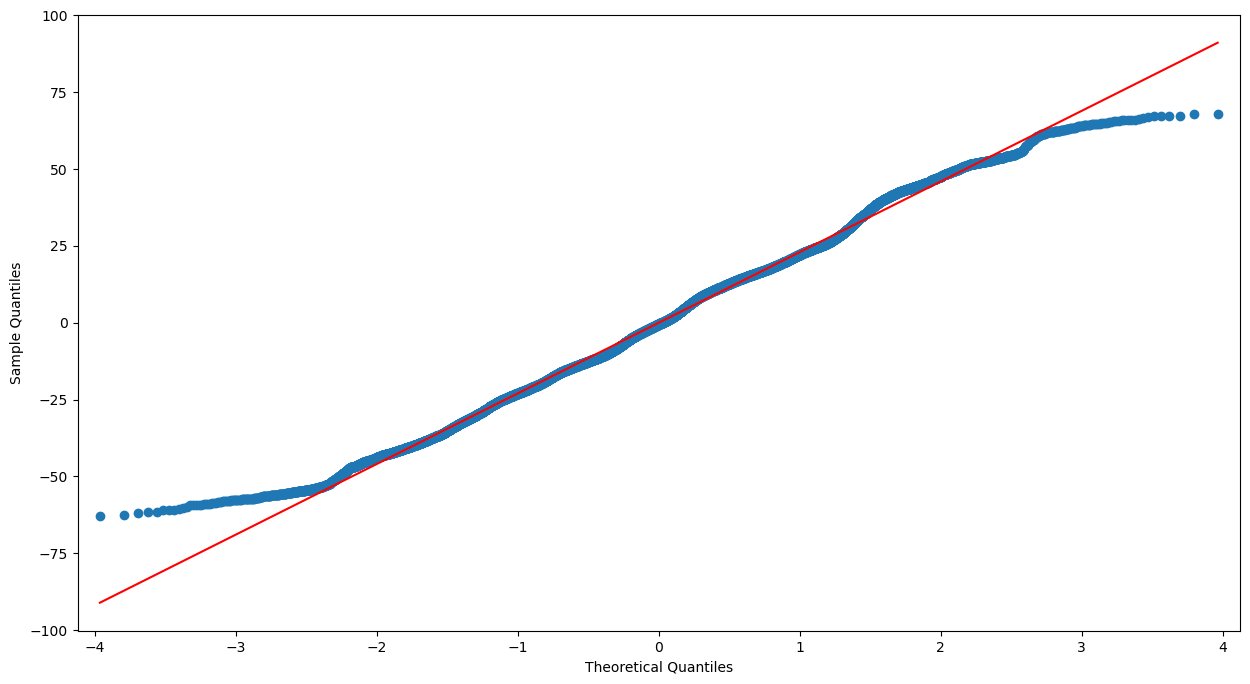

In [91]:
sma.qqplot(model_dummy.resid,line='r');

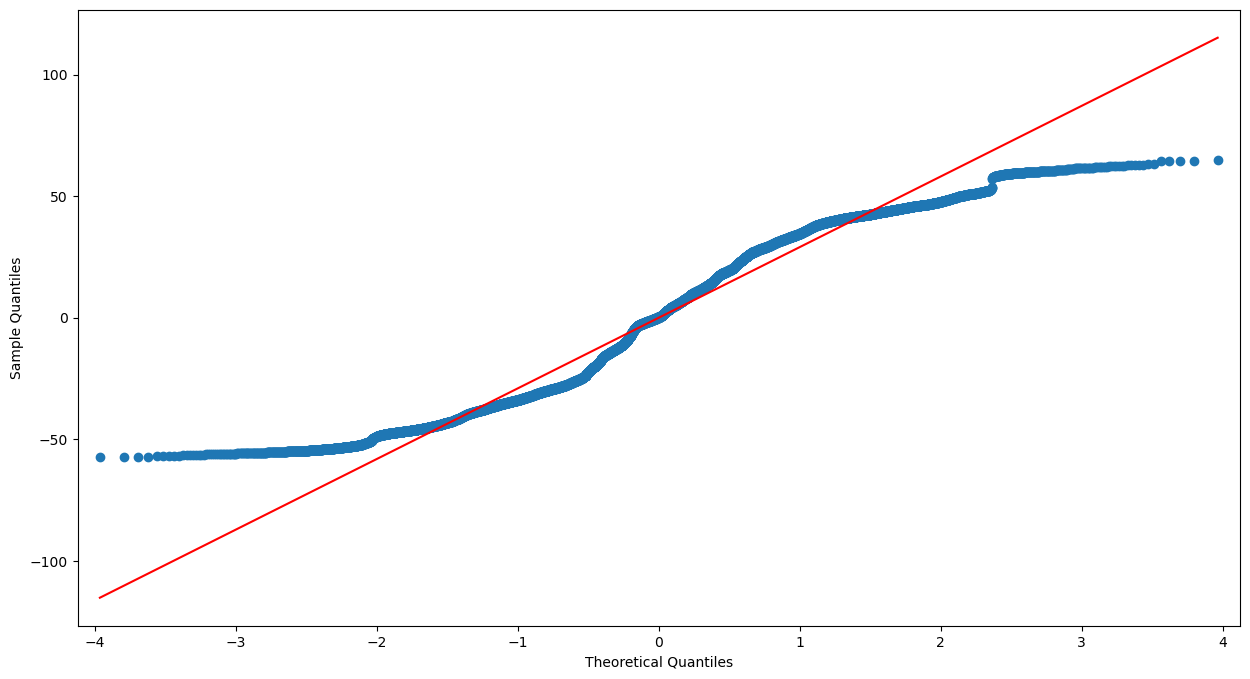

In [92]:
sma.qqplot(model_label.resid,line='r');

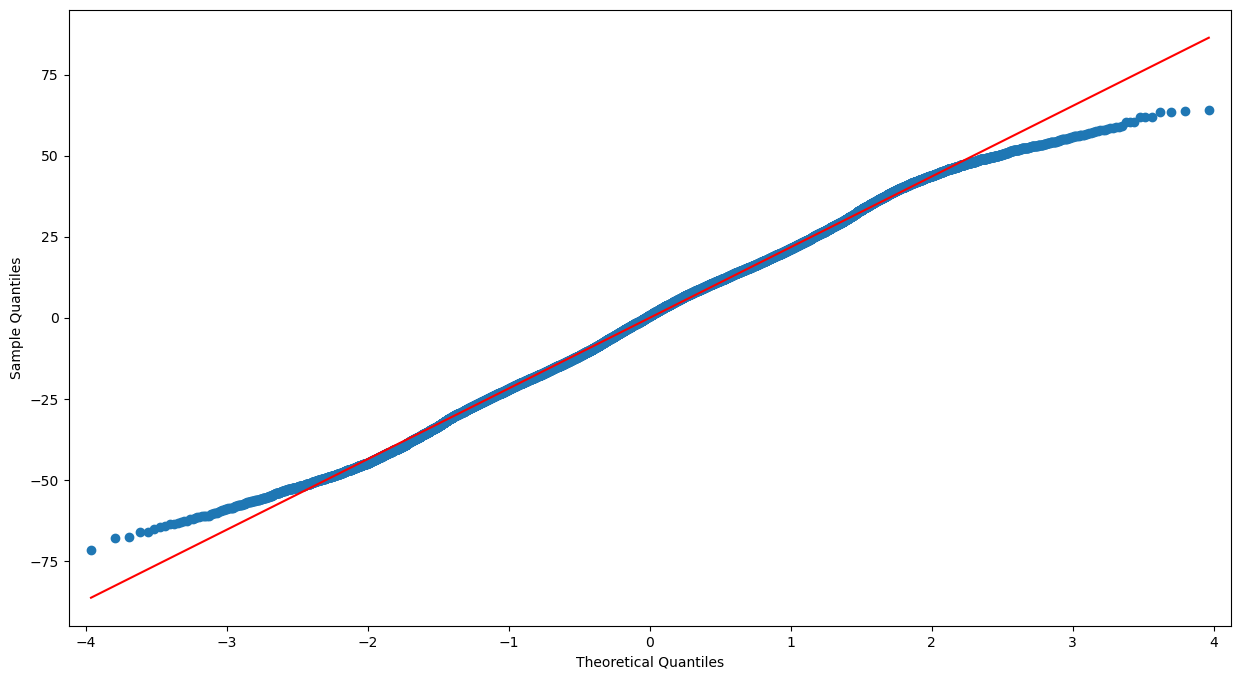

In [93]:
sma.qqplot(model_mean.resid,line='r');

# BreuschPagan Test

In [96]:
import statsmodels.stats.api as ssa

#model.expg:represents all the data points or input varibles
#exog:independent variables
#enog:dependent variables
#This is compared between residuals and actual values
ssa.het_breuschpagan(model_dummy.resid,model_dummy.model.exog)

(10246.604346712767, 0.0, 66.45881038984362, 0.0)

In [97]:
#Here p-value = 0 so we reject H0

In [98]:
#So model has heterosecadacity

In [99]:
ssa.het_breuschpagan(model_label.resid,model_label.model.exog)

(1348.446500622731,
 1.2320697498685044e-257,
 41.67334771876448,
 1.0465993971562047e-268)

In [100]:
#Here p-value < SL so we reject H0

In [101]:
#So model has heterosecadacity

In [102]:
ssa.het_breuschpagan(model_mean.resid,model_mean.model.exog)

(1019.1272324735494,
 4.346604581562451e-189,
 33.046201969792136,
 1.675203633483872e-197)

In [103]:
#Here p-value < SL so we reject H0

In [104]:
#So model has heterosecadacity

# Durbin Watson

In [105]:
from statsmodels.stats.stattools import durbin_watson

In [106]:
durbin_watson(model_dummy.resid)

1.9862944887747962

In [107]:
durbin_watson(model_label.resid)

1.987384612675392

In [108]:
durbin_watson(model_mean.resid)

1.9906663526441533

In [109]:
#It has values lesser than 2 so it has auto corelation

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Dummy Model Sklearn

In [119]:
lr = LinearRegression()
model_dummy_lr = lr.fit(X_train_dummy,y_train_dummy)
pred_train_dummy = model_dummy_lr.predict(X_train_dummy)
pred_test_dummy = model_dummy_lr.predict(X_test_dummy)

In [120]:
r2_train_dummy = r2_score(y_train_dummy,pred_train_dummy)
r2_test_dummy = r2_score(y_test_dummy,pred_test_dummy)
print('R2 Train:',r2_train_dummy)
print('R2 Test:',r2_test_dummy)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train_dummy,pred_train_dummy)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test_dummy,pred_test_dummy)))

R2 Train: 0.4285761444989318
R2 Test: 0.41606306430795015
RMSE Train: 23.01728943553615
RMSE Test: 23.228373746670943


# Label Model Sklearn

In [122]:
lr = LinearRegression()
model_label_lr = lr.fit(X_train_label,y_train_label)
pred_train_label = model_label_lr.predict(X_train_label)
pred_test_label = model_label_lr.predict(X_test_label)

In [124]:
r2_train_label = r2_score(y_train_label,pred_train_label)
r2_test_label = r2_score(y_test_labek,pred_test_label)
print('R2 Train:',r2_train_label)
print('R2 Test:',r2_test_label)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train_label,pred_train_label)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test_labek,pred_test_label)))

R2 Train: 0.04991112344262916
R2 Test: 0.04224406616666743
RMSE Train: 29.679536342591064
RMSE Test: 29.748375701328722


# Mean Model Sklearn

In [125]:
lr = LinearRegression()
model_mean_lr = lr.fit(X_train_mean,y_train_mean)
pred_train_mean = model_mean_lr.predict(X_train_mean)
pred_test_mean = model_mean_lr.predict(X_test_mean)

In [126]:
r2_train_mean = r2_score(y_train_mean,pred_train_mean)
r2_test_mean = r2_score(y_test_mean,pred_test_mean)
print('R2 Train:',r2_train_mean)
print('R2 Test:',r2_test_mean)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train_mean,pred_train_mean)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test_mean,pred_test_mean)))

R2 Train: 0.4870917463485229
R2 Test: 0.48248307830979065
RMSE Train: 21.806945549675305
RMSE Test: 21.867448351141043


# VIF-Multicollinearity

In [127]:
#Let us create a list of VIF

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dummy Model

In [130]:
vif_list = []
for i in range(X_train_dummy.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_dummy.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_dummy.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
260,brand_name_Token,inf
233,brand_name_National,inf
231,brand_name_Monarch,inf
230,brand_name_Moms,inf
229,brand_name_Modell,inf
...,...,...
150,houseowner_Y,1.150051
10,recyclable_package,1.120128
12,units_per_case,1.106354
138,gender_M,1.025267


In [131]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
35,salad_bar,inf
18,avg_cars_at home(approx).1,inf
15,avg_cars_at home(approx),inf
36,prepared_food,inf
32,meat_sqft,3.343570e+08
31,frozen_sqft,3.341448e+08
29,store_sqft,6.696425e+03
30,grocery_sqft,2.537312e+03
26,store_type,1.018103e+02
37,florist,6.974422e+01


In [132]:
vif_list = []
for i in range(X_train_mean.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_mean.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_mean.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
30,grocery_sqft,inf
15,avg_cars_at home(approx),inf
36,prepared_food,inf
35,salad_bar,inf
32,meat_sqft,inf
31,frozen_sqft,inf
18,avg_cars_at home(approx).1,inf
29,store_sqft,inf
27,store_city,inf
26,store_type,9.496064


In [133]:
X_mean = usdata_mean_encoded.drop(['cost','grocery_sqft'],axis=1)
y_mean = usdata_mean_encoded['cost']
X_train_mean,X_test_mean,y_train_mean,y_test_mean = train_test_split(X_mean,y_mean,train_size=0.70,random_state=1)

In [134]:
vif_list = []
for i in range(X_train_mean.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_mean.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_mean.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
30,frozen_sqft,inf
15,avg_cars_at home(approx),inf
35,prepared_food,inf
34,salad_bar,inf
31,meat_sqft,inf
18,avg_cars_at home(approx).1,inf
29,store_sqft,inf
27,store_city,inf
26,store_type,9.496064
36,florist,3.483048


In [135]:
X_mean = usdata_mean_encoded.drop(['cost','grocery_sqft','frozen_sqft'],axis=1)
y_mean = usdata_mean_encoded['cost']
X_train_mean,X_test_mean,y_train_mean,y_test_mean = train_test_split(X_mean,y_mean,train_size=0.70,random_state=1)

In [136]:
vif_list = []
for i in range(X_train_mean.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_mean.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_mean.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
18,avg_cars_at home(approx).1,inf
15,avg_cars_at home(approx),inf
34,prepared_food,inf
33,salad_bar,inf
29,store_sqft,inf
27,store_city,inf
30,meat_sqft,6.146649e+04
26,store_type,9.496064e+00
35,florist,3.483048e+00
28,store_state,2.158546e+00


In [137]:
X_mean = usdata_mean_encoded.drop(['cost','grocery_sqft','frozen_sqft','avg_cars_at home(approx).1'],axis=1)
y_mean = usdata_mean_encoded['cost']
X_train_mean,X_test_mean,y_train_mean,y_test_mean = train_test_split(X_mean,y_mean,train_size=0.70,random_state=1)

In [138]:
vif_list = []
for i in range(X_train_mean.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_mean.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_mean.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
33,prepared_food,inf
32,salad_bar,inf
28,store_sqft,inf
26,store_city,inf
29,meat_sqft,6.146649e+04
25,store_type,9.496064e+00
34,florist,3.483048e+00
27,store_state,2.158546e+00
30,coffee_bar,2.132385e+00
1,food_department,1.978524e+00


In [139]:
X_mean = usdata_mean_encoded.drop(['cost','grocery_sqft','frozen_sqft','avg_cars_at home(approx).1','prepared_food'],axis=1)
y_mean = usdata_mean_encoded['cost']
X_train_mean,X_test_mean,y_train_mean,y_test_mean = train_test_split(X_mean,y_mean,train_size=0.70,random_state=1)

In [140]:
vif_list = []
for i in range(X_train_mean.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_mean.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_mean.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
26,store_city,inf
28,store_sqft,inf
29,meat_sqft,6.146649e+04
25,store_type,9.496064e+00
32,salad_bar,5.188475e+00
33,florist,3.483048e+00
27,store_state,2.158546e+00
30,coffee_bar,2.132385e+00
1,food_department,1.978524e+00
21,net_weight,1.623626e+00


In [141]:
X_mean = usdata_mean_encoded.drop(['cost','grocery_sqft','frozen_sqft','avg_cars_at home(approx).1','prepared_food','store_city'],axis=1)
y_mean = usdata_mean_encoded['cost']
X_train_mean,X_test_mean,y_train_mean,y_test_mean = train_test_split(X_mean,y_mean,train_size=0.70,random_state=1)

In [142]:
vif_list = []
for i in range(X_train_mean.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_mean.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_mean.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
28,meat_sqft,61466.493782
27,store_sqft,60962.634989
25,store_type,9.496064
31,salad_bar,5.188475
32,florist,3.483048
26,store_state,2.158546
29,coffee_bar,2.132385
1,food_department,1.978524
21,net_weight,1.623626
20,gross_weight,1.617460


In [143]:
X_mean = usdata_mean_encoded.drop(['cost','grocery_sqft','frozen_sqft','avg_cars_at home(approx).1','prepared_food','store_city','meat_sqft'],axis=1)
y_mean = usdata_mean_encoded['cost']
X_train_mean,X_test_mean,y_train_mean,y_test_mean = train_test_split(X_mean,y_mean,train_size=0.70,random_state=1)

In [144]:
vif_list = []
for i in range(X_train_mean.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_mean.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_mean.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
25,store_type,4.627290
31,florist,2.793244
30,salad_bar,2.199162
27,store_sqft,2.140449
26,store_state,2.103386
1,food_department,1.978469
28,coffee_bar,1.664601
21,net_weight,1.623609
20,gross_weight,1.617451
2,food_family,1.530809


In [145]:
#Now we have removed every column which has multicollinearity now let us try to build a model

In [149]:
X_mean = usdata_mean_encoded.drop(['cost','grocery_sqft','frozen_sqft','avg_cars_at home(approx).1','prepared_food','store_city','meat_sqft'],axis=1)
y_mean = usdata_mean_encoded['cost']
X_train_mean,X_test_mean,y_train_mean,y_test_mean = train_test_split(X_mean,y_mean,train_size=0.70,random_state=1)

In [150]:
lr = LinearRegression()
model_mean_lr_no_multi = lr.fit(X_train_mean,y_train_mean)
pred_train_mean = model_mean_lr_no_multi.predict(X_train_mean)
pred_test_mean = model_mean_lr_no_multi.predict(X_test_mean)

In [151]:
r2_train_mean = r2_score(y_train_mean,pred_train_mean)
r2_test_mean = r2_score(y_test_mean,pred_test_mean)
print('R2 Train:',r2_train_mean)
print('R2 Test:',r2_test_mean)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train_mean,pred_train_mean)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test_mean,pred_test_mean)))

R2 Train: 0.4866419974170286
R2 Test: 0.4820638882293927
RMSE Train: 21.81650427811003
RMSE Test: 21.876302904058626


# Label Model VIF Removal

In [152]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
35,salad_bar,inf
18,avg_cars_at home(approx).1,inf
15,avg_cars_at home(approx),inf
36,prepared_food,inf
32,meat_sqft,3.343570e+08
31,frozen_sqft,3.341448e+08
29,store_sqft,6.696425e+03
30,grocery_sqft,2.537312e+03
26,store_type,1.018103e+02
37,florist,6.974422e+01


In [153]:
X_label = usdata_label_encoded.drop(['cost','salad_bar'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [154]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
15,avg_cars_at home(approx),inf
18,avg_cars_at home(approx).1,inf
32,meat_sqft,3.343570e+08
31,frozen_sqft,3.341448e+08
29,store_sqft,6.696425e+03
30,grocery_sqft,2.537312e+03
26,store_type,1.018103e+02
36,florist,6.974422e+01
27,store_city,5.729708e+01
21,gross_weight,4.576048e+01


In [155]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [156]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
31,meat_sqft,3.343570e+08
30,frozen_sqft,3.341448e+08
28,store_sqft,6.696425e+03
29,grocery_sqft,2.537312e+03
25,store_type,1.018103e+02
35,florist,6.974422e+01
26,store_city,5.729708e+01
20,gross_weight,4.576048e+01
21,net_weight,4.573056e+01
34,prepared_food,3.424677e+01


In [157]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [158]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
28,store_sqft,6677.087572
30,frozen_sqft,2922.706943
29,grocery_sqft,2507.524537
20,gross_weight,450.314001
21,net_weight,333.397311
3,store_sales(in millions),135.919961
25,store_type,100.958264
5,unit_sales(in millions),90.209648
19,SRP,89.423294
34,florist,69.717033


In [159]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [160]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
20,gross_weight,448.057487
21,net_weight,332.142271
29,frozen_sqft,234.291006
3,store_sales(in millions),133.284630
28,grocery_sqft,105.037937
5,unit_sales(in millions),87.190512
19,SRP,86.439623
25,store_type,73.196105
4,store_cost(in millions),51.330012
32,prepared_food,32.088606


In [161]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [162]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
28,frozen_sqft,232.121394
3,store_sales(in millions),133.269328
27,grocery_sqft,101.982374
5,unit_sales(in millions),87.139673
19,SRP,86.357286
24,store_type,71.017319
4,store_cost(in millions),51.325810
31,prepared_food,31.896243
32,florist,29.634426
26,store_state,26.684604


In [163]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight','frozen_sqft'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [164]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
3,store_sales(in millions),130.384777
27,grocery_sqft,90.046648
19,SRP,83.128738
5,unit_sales(in millions),80.036247
4,store_cost(in millions),51.325667
26,store_state,23.484582
24,store_type,22.209833
25,store_city,18.599470
30,prepared_food,14.380358
31,florist,9.985043


In [165]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight','frozen_sqft','store_sales(in millions)'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [166]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
26,grocery_sqft,75.875325
4,unit_sales(in millions),40.312990
18,SRP,35.481602
3,store_cost(in millions),33.062208
25,store_state,22.479937
23,store_type,19.769464
24,store_city,18.448209
29,prepared_food,14.348566
30,florist,9.901438
1,food_department,7.719267


In [167]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight','frozen_sqft','store_sales(in millions)','grocery_sqft'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [168]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
4,unit_sales(in millions),37.326327
18,SRP,31.074288
3,store_cost(in millions),29.390966
23,store_type,19.512907
24,store_city,18.138865
25,store_state,18.075266
28,prepared_food,10.564072
29,florist,9.647513
1,food_department,7.718986
19,net_weight,7.229950


In [169]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight','frozen_sqft','store_sales(in millions)','grocery_sqft','unit_sales(in millions)'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [170]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
24,store_state,18.066713
23,store_city,17.473440
17,SRP,17.079984
22,store_type,15.265951
3,store_cost(in millions),12.545760
27,prepared_food,9.847552
28,florist,9.205418
1,food_department,7.718756
18,net_weight,7.186604
11,occupation,7.129854


In [171]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight','frozen_sqft','store_sales(in millions)','grocery_sqft','unit_sales(in millions)','store_state'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [172]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
17,SRP,17.079894
22,store_type,14.083987
3,store_cost(in millions),12.545697
1,food_department,7.718615
18,net_weight,7.185938
11,occupation,7.125908
13,avg. yearly_income,6.531106
2,food_family,6.530231
15,avg_cars_at home(approx).1,6.482115
0,food_category,6.208193


In [173]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight','frozen_sqft','store_sales(in millions)','grocery_sqft','unit_sales(in millions)','store_state','SRP'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [174]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
21,store_type,14.018684
1,food_department,7.716774
17,net_weight,7.161640
11,occupation,7.114244
2,food_family,6.516685
13,avg. yearly_income,6.515785
15,avg_cars_at home(approx).1,6.480761
0,food_category,6.198529
22,store_city,5.455690
25,prepared_food,5.152841


In [175]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight','frozen_sqft','store_sales(in millions)','grocery_sqft','unit_sales(in millions)','store_state','SRP','store_type'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [176]:
vif_list = []
for i in range(X_train_label.shape[1]):
    vif_list.append(variance_inflation_factor(X_train_label.values,i)) #this creates VIF and now lets puts the output
pd.DataFrame({'Features':X_train_label.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
1,food_department,7.716452
17,net_weight,6.840553
11,occupation,6.787732
15,avg_cars_at home(approx).1,6.352328
2,food_family,6.303321
0,food_category,6.141806
13,avg. yearly_income,6.071355
21,store_city,5.058706
8,total_children,4.879225
6,marital_status,4.446605


In [177]:
#Now we have removed columns which have multicollinearity now it's time to build a model

In [178]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight','frozen_sqft','store_sales(in millions)','grocery_sqft','unit_sales(in millions)','store_state','SRP','store_type'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [180]:
lr = LinearRegression()
model_label_lr_no_multi = lr.fit(X_train_label,y_train_label)
pred_train_label = model_label_lr_no_multi.predict(X_train_label)
pred_test_label = model_label_lr_no_multi.predict(X_test_label)

In [181]:
r2_train_label = r2_score(y_train_label,pred_train_label)
r2_test_label = r2_score(y_test_labek,pred_test_label)
print('R2 Train:',r2_train_label)
print('R2 Test:',r2_test_label)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train_label,pred_train_label)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test_labek,pred_test_label)))

R2 Train: 0.022715109497639108
R2 Test: 0.014216608548641374
RMSE Train: 30.101323245700577
RMSE Test: 30.180510422912988


# SFS

# Label Model

In [182]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector

In [183]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight','frozen_sqft','store_sales(in millions)','grocery_sqft','unit_sales(in millions)','store_state','SRP','store_type'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [184]:
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator=lr,k_features='best',forward=True,
                                       #verbose=2,
                                       scoring='r2')
sfs_forward.fit(X_train_label,y_train_label)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 27),
                          scoring='r2')

In [185]:
sfs_forward.k_feature_names_
sfs_forward.k_score_

0.02150387813330945

In [186]:
sfs_forward.k_feature_names_

('promotion_name',
 'marital_status',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg_cars_at home(approx).1',
 'store_city',
 'coffee_bar',
 'prepared_food',
 'florist',
 'media_type')

In [187]:
newx = X_train_label.loc[:,sfs_forward.k_feature_names_]

In [189]:
testx = X_test_label.loc[:,sfs_forward.k_feature_names_]

In [190]:
lr = LinearRegression()
model_label_sfs = lr.fit(newx,y_train_label)
pred_train_label = model_label_sfs.predict(newx)
pred_test_label = model_label_sfs.predict(testx)

In [191]:
r2_train_label = r2_score(y_train_label,pred_train_label)
r2_test_label = r2_score(y_test_labek,pred_test_label)
print('R2 Train:',r2_train_label)
print('R2 Test:',r2_test_label)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train_label,pred_train_label)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test_labek,pred_test_label)))

R2 Train: 0.022396330066667747
R2 Test: 0.014118202387188306
RMSE Train: 30.10623220337271
RMSE Test: 30.182016775166357


# Mean Model

In [193]:
X_mean = usdata_mean_encoded.drop(['cost','grocery_sqft','frozen_sqft','avg_cars_at home(approx).1','prepared_food','store_city','meat_sqft'],axis=1)
y_mean = usdata_mean_encoded['cost']
X_train_mean,X_test_mean,y_train_mean,y_test_mean = train_test_split(X_mean,y_mean,train_size=0.70,random_state=1)

In [194]:
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator=lr,k_features='best',forward=True,
                                       #verbose=2,
                                       scoring='r2')
sfs_forward.fit(X_train_mean,y_train_mean)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 33),
                          scoring='r2')

In [195]:
sfs_forward.k_feature_names_
sfs_forward.k_score_

0.4856669683936833

In [196]:
sfs_forward.k_feature_names_

('food_category',
 'food_family',
 'store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'promotion_name',
 'sales_country',
 'total_children',
 'education',
 'houseowner',
 'avg_cars_at home(approx)',
 'brand_name',
 'gross_weight',
 'net_weight',
 'units_per_case',
 'store_type',
 'store_state',
 'store_sqft',
 'salad_bar',
 'florist',
 'media_type')

In [197]:
newx = X_train_mean.loc[:,sfs_forward.k_feature_names_]

In [198]:
testx = X_test_mean.loc[:,sfs_forward.k_feature_names_]

In [199]:
lr = LinearRegression()
model_mean_sfs = lr.fit(newx,y_train_mean)
pred_train_mean = model_mean_sfs.predict(newx)
pred_test_mean = model_mean_sfs.predict(testx)

In [200]:
r2_train_mean = r2_score(y_train_mean,pred_train_mean)
r2_test_mean = r2_score(y_test_mean,pred_test_mean)
print('R2 Train:',r2_train_mean)
print('R2 Test:',r2_test_mean)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train_mean,pred_train_mean)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test_mean,pred_test_mean)))

R2 Train: 0.4865138263007318
R2 Test: 0.4820345700825981
RMSE Train: 21.81922759320269
RMSE Test: 21.876922057241043


# RFE

# Mean Model

In [213]:
X_mean = usdata_mean_encoded.drop(['cost','grocery_sqft','frozen_sqft','avg_cars_at home(approx).1','prepared_food','store_city','meat_sqft'],axis=1)
y_mean = usdata_mean_encoded['cost']
X_train_mean,X_test_mean,y_train_mean,y_test_mean = train_test_split(X_mean,y_mean,train_size=0.70,random_state=1)

In [214]:
from sklearn.feature_selection import RFE
lr = LinearRegression()
rfe = RFE(estimator=lr,n_features_to_select=5)
rfe.fit(X_train_mean,y_train_mean)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [215]:
feature_index = pd.Series(rfe.ranking_,index=X_train_mean.columns).sort_values(ascending=False)
impfeature_rfe = feature_index[feature_index==1].index

In [216]:
newx = X_train_mean.loc[:,impfeature_rfe]
testx = X_test_mean.loc[:,impfeature_rfe]

In [217]:
lr = LinearRegression()
model_mean_rfe = lr.fit(newx,y_train_mean)
pred_train_mean = model_mean_rfe.predict(newx)
pred_test_mean = model_mean_rfe.predict(testx)

In [218]:
r2_train_mean = r2_score(y_train_mean,pred_train_mean)
r2_test_mean = r2_score(y_test_mean,pred_test_mean)
print('R2 Train:',r2_train_mean)
print('R2 Test:',r2_test_mean)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train_mean,pred_train_mean)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test_mean,pred_test_mean)))

R2 Train: 0.3680807790332209
R2 Test: 0.3644710610931794
RMSE Train: 24.205038514694603
RMSE Test: 24.23279439447008


# Label Model

In [208]:
X_label = usdata_label_encoded.drop(['cost','salad_bar','avg_cars_at home(approx)','meat_sqft','store_sqft','gross_weight','frozen_sqft','store_sales(in millions)','grocery_sqft','unit_sales(in millions)','store_state','SRP','store_type'],axis=1)
y_label = usdata_label_encoded['cost']
X_train_label,X_test_label,y_train_label,y_test_labek = train_test_split(X_label,y_label,train_size=0.70,random_state=1)

In [209]:
from sklearn.feature_selection import RFE
lr = LinearRegression()
rfe = RFE(estimator=lr,n_features_to_select=5)
rfe.fit(X_train_label,y_train_label)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [210]:
feature_index = pd.Series(rfe.ranking_,index=X_train_label.columns).sort_values(ascending=False)
impfeature_rfe = feature_index[feature_index==1].index

In [211]:
lr = LinearRegression()
model_label_rfe = lr.fit(newx,y_train_label)
pred_train_label = model_label_rfe.predict(newx)
pred_test_label = model_label_rfe.predict(testx)

In [212]:
r2_train_label = r2_score(y_train_label,pred_train_label)
r2_test_label = r2_score(y_test_labek,pred_test_label)
print('R2 Train:',r2_train_label)
print('R2 Test:',r2_test_label)
print('RMSE Train:',np.sqrt(mean_squared_error(y_train_label,pred_train_label)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test_labek,pred_test_label)))

R2 Train: 0.36808077904778436
R2 Test: 0.36447106105818416
RMSE Train: 24.20503851441568
RMSE Test: 24.232794395137265
